### <span style="color: blue;">**<u>Task 1</u>: Prepare a complete data analysis report on the given data.**

### <span style="color: blue;">**<u>Task 2</u>: Create a predictive model by applying some data science techniques for the price of cars with the available independent variables. That should help the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.**
 

## **1.<u>Importing Libraries:</u>**

In [1]:
#Data Analysis & Data wrangling
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Suppress Warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn packages
#Machine learning packages
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# stats packages
from scipy.stats import skew, kurtosis

## **2. <u>Load the data:<u/>**

In [2]:
app=pd.read_csv('auto_imports.csv')

pd.set_option('display.max_columns', None)

# By setting 'app' is our DataFrame
app

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## 3. <u>Renaming the Columns:</u> 

In [3]:
# Define a mapping for column renaming
column_mapping = {
    '3': 'symboling',
    '?': 'normalized_losses',
    'alfa-romero': 'make',
    'gas': 'fuel_type',
    'std': 'aspiration',
    'two': 'num_of_doors',
    'convertible': 'body_style',
    'rwd': 'drive_wheels',
    'front': 'engine_location',
    '88.60': 'wheel_base',
    '168.80': 'length',
    '64.10': 'width',
    '48.80': 'height',
    '2548': 'curb_weight',
    'dohc': 'engine_type',
    'four': 'num_of_cylinders',
    '130': 'engine_size',
    'mpfi': 'fuel_system',
    '3.47': 'bore',
    '2.68': 'stroke',
    '9.00': 'compression_ratio',
    '111': 'horsepower',
    '5000': 'peak_rpm',
    '21': 'city_mpg',
    '27': 'highway_mpg',
    '13495': 'price'  
}

# Rename the columns in the DataFrame
app.rename(columns=column_mapping, inplace=True)

#### Renamed the columns according to our desired format or conventions as provided by Datamites Internship team in a dataset file. This step can include making them more readable, removing absurd names, and ensuring consistency.

 By renaming the columns too early, even before domain analysis is the must step to set the foundation for a smoother analysis process, making it easier to understand and interpret our data. 

 It enhances the clarity of our dataset, making it easier to understand and interpret during the exploratory data analysis (EDA) stage. By using meaningful and consistent column names, we can improve the readability of visualizations, facilitate collaboration with others, and reduce the chances of misinterpretation.

#### Performing column rename as part of our data preprocessing routine before EDA is a good practice. It helps to set the stage for a more effective and insightful analysis.

## 4.<u>Domain Analysis</u>

#### Dataset appears to be related to automobile information, and here is the insights as per analysis:
- Symboling: Represents the risk factor of the car. Negative values indicate a lower risk, while positive values indicate a higher risk. It can be used by the management to understand the safety profile of different car models.
- Normalized Losses: Represents the average loss payment per insured vehicle year. The "?" values need to be addressed, possibly through imputation or removal. Normalized losses can be an important factor for insurance pricing and risk assessment.
- Make: Describes the manufacturer of the car, ranging from alfa-romero to volvo. Management can analyze how different manufacturers' cars are priced and strategize accordingly.
- Fuel Type and Aspiration: Provides information on the fuel type (gas or diesel) and aspiration type (std or turbo). These attributes can influence the pricing strategy based on market demands and environmental considerations.
- Number of Doors, Body Style, and Drive Wheels: These categorical variables can influence the design and functionality of the car. For example, two-door cars may be priced differently than four-door cars. The body style and drive wheels also contribute to the overall aesthetics and performance.
- Engine Characteristics: Variables such as engine location, type, number of cylinders, size, and fuel system provide insights into the car's performance and efficiency. Management can use this information to optimize designs and target specific market segments.
- Vehicle Dimensions: Wheelbase, length, width, and height give information about the car's size. These features can affect manufacturing costs and market positioning.
- Weight and Performance: Curb weight, horsepower, peak RPM, and compression ratio contribute to the car's performance and fuel efficiency. These attributes can influence pricing and marketing strategies.
- Fuel Efficiency: City and highway miles per gallon (MPG) provide information on fuel efficiency. This can impact the pricing strategy based on consumers' preferences and environmental concerns.
- Price (Target Variable): The target variable, which is the price of the car, is continuous. This is what the predictive model aims to predict. Understanding the factors influencing price is crucial for business decisions.
#### Hence, we are dealing with <u>Regression Problem.</u>


## 5. <u>Basic Checks:</u>

In [4]:
app.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


### <u>Insights:</u>
- Each row represents a car and each column represents different attributes or features of the cars.

In [5]:
app.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
195,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
196,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
197,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
198,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
199,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [6]:
app.shape

(200, 26)

### <u>Insights:</u>
- Dataset has 200 rows and 26 columns. 


In [7]:
app.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                  int64
dtype: object

### <u>Insights:</u>
- Integer (int64): Columns like 3, 2548, 130, 21, 27, 13495 are represented as integers.
- Float (float64): Columns like 88.60, 168.80, 64.10, 48.80, 9.00 are represented as floating-point numbers.
- Object: Columns with data type object may contain a variety of data types, including strings or mixed types. This includes columns like ?, alfa-romero, gas, std, two, convertible, rwd, front, dohc, four, mpfi, 3.47, 2.68, 111, 5000.
- It appears that some columns, such as 3.47, 2.68, 111, 5000, which seem to contain numeric values, are currently classified as object. We might need to convert these columns to numeric types for proper analysis and modeling.

In [8]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          200 non-null    int64  
 1   normalized_losses  200 non-null    object 
 2   make               200 non-null    object 
 3   fuel_type          200 non-null    object 
 4   aspiration         200 non-null    object 
 5   num_of_doors       200 non-null    object 
 6   body_style         200 non-null    object 
 7   drive_wheels       200 non-null    object 
 8   engine_location    200 non-null    object 
 9   wheel_base         200 non-null    float64
 10  length             200 non-null    float64
 11  width              200 non-null    float64
 12  height             200 non-null    float64
 13  curb_weight        200 non-null    int64  
 14  engine_type        200 non-null    object 
 15  num_of_cylinders   200 non-null    object 
 16  engine_size        200 non

### <u>Insights:</u>
- DataFrame Information: Class: pandas.core.frame.DataFrame
- RangeIndex: 200 entries, indexed from 0 to 199.
- Approximate memory usage: 40.8+ KB.
##### It's clear that some columns with numeric values are currently represented as objects, so we may need to convert them to numeric types for proper analysis. Additionally, the "?" values in the dataset might need attention, either through imputation or removal, depending on our analysis goals.


In [9]:
app.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,200.0,0.8300,1.248557,-2.0,0.000,1.0,2.000,3.0
wheel_base,200.0,98.8480,6.038261,86.6,94.500,97.0,102.400,120.9
length,200.0,174.2280,12.347132,141.1,166.675,173.2,183.500,208.1
width,200.0,65.8980,2.102904,60.3,64.175,65.5,66.675,72.0
height,200.0,53.7915,2.428449,47.8,52.000,54.1,55.525,59.8
curb_weight,200.0,2555.7050,518.594552,1488.0,2163.000,2414.0,2928.250,4066.0
engine_size,200.0,126.8600,41.650501,61.0,97.750,119.5,142.000,326.0
compression_ratio,200.0,10.1701,4.014163,7.0,8.575,9.0,9.400,23.0
city_mpg,200.0,25.2000,6.432487,13.0,19.000,24.0,30.000,49.0
highway_mpg,200.0,30.7050,6.827227,16.0,25.000,30.0,34.000,54.0


### <u>Insights:</u>
- The 'symboling' column represents the insurance risk rating. Most cars in the dataset have a positive rating, indicating a relatively lower risk.
- The 'wheel base' column represents the distance between the centers of the front and rear wheels. The values suggest a range of wheel base lengths, with most falling between 94.5 and 102.4.
- The 'length' column represents the length of the cars. The values show a range of car lengths, with most falling between 166.675 and 183.5.
- The 'width' column represents the width of the cars. The values suggest a range of car widths, with most falling between 64.175 and 66.675.
- The 'curb weight' column represents the weight of the cars without occupants or baggage. The values show a range of curb weights, with most falling between 2163.0 and 2928.25.
- The 'engine size' column represents the size of the car's engine. The values show a range of engine sizes, with most falling between 97.75 and 142.0.
- The 'compression ratio' column represents the ratio of the volume of the cylinder at the bottom of the stroke to the volume at the top. The values show a range of compression ratios, with most falling between 8.575 and 9.4.
- The 'city MPG' column represents the miles per gallon (MPG) in city driving conditions. The values show a range of city MPG, with most falling between 19.0 and 30.0.
-  The 'highway MPG' column represents the miles per gallon (MPG) in highway driving conditions. The values show a range of highway MPG, with most falling between 25.0 and 34.0.
- The 'Price' column provides information about the prices of cars in the dataset. The statistics reveal a wide range of car prices, with a mean around 13,205.69 dollars. 
- The standard deviation indicates the variability in prices, and the quartiles give insights into the distribution of prices within the dataset. The minimum and maximum values represent the range of car prices observed in the dataset, with the most expensive car priced at 45,400.0 dollars and the least expensive at 5118.0 dollars.

In [10]:
app.duplicated().sum()

0

### <u>Insights:</u>
- No duplicated values in our dataset.

In [10]:
app.isnull().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_of_cylinders     0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

### <u>Insights:</u>
- Not having a null value, but we have corrupt data, which we can convert into NAN and then imputation can be performed.

## 6. <u>Data Preprocessing</u>
- In this project, decided to shuffle steps, as per requirement, as extensive data cleaning is required, without that, EDA will give inaccurate insights.
- Here we will only handle all the corrupt values/ missing values, to make more efficient visual representation as we need to change data type format as per their data context. 


In [11]:
app.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [12]:
app.sample(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
110,0,?,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,l,four,152,idi,3.70,3.52,21.0,95,4150,25,25,17075
145,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,63.6,54.5,1985,ohc,four,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
63,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552
59,0,?,mazda,diesel,std,?,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795
77,3,153,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2328,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499
136,0,102,subaru,gas,std,four,sedan,fwd,front,97.2,172.0,65.4,52.5,2145,ohcf,four,108,2bbl,3.62,2.64,9.5,82,4800,32,37,7126
128,2,104,saab,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2695,ohc,four,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170
159,1,168,toyota,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2204,ohc,four,98,2bbl,3.19,3.03,9.0,70,4800,29,34,8238
9,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925
96,0,106,nissan,gas,std,four,sedan,fwd,front,97.2,173.4,65.2,54.7,2302,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,9549


### 6.1 <u>Handling Missing Values/ Corrupt values</u>

In [13]:
for column in app.columns:
    unique_values = app[column].unique()
    print(f"Unique values for '{column}':\n{unique_values}\n")

Unique values for 'symboling':
[ 3  1  2  0 -1 -2]

Unique values for 'normalized_losses':
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Unique values for 'make':
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Unique values for 'fuel_type':
['gas' 'diesel']

Unique values for 'aspiration':
['std' 'turbo']

Unique values for 'num_of_doors':
['two' 'four' '?']

Unique values for 'body_style':
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values for 'drive_wheels':
['rwd' 'fwd' '4wd']

Unique values for 'engine_location':
['front' 'rear']

Unique value

####  Normalized losses having '?' in its unique value, which needs to be handle, so first converted that to NAN and then imputed with median as the data is skewed.

In [14]:
# Replace '?' with NaN and convert the column to numeric
app['normalized_losses'] = pd.to_numeric(app['normalized_losses'].replace('?', np.nan))

# Impute missing values with the median
app['normalized_losses'].fillna(app['normalized_losses'].median(), inplace=True)

app['normalized_losses'] = app['normalized_losses'].astype(float)

#### Peak-rpm also has '?' value, needs to handle it.

In [15]:
# Here 'app' is our DataFrame and 'rpm' is the column containing RPM values
# Replace '?' with NaN and convert the column to numeric
app['peak_rpm'] = pd.to_numeric(app['peak_rpm'].replace('?', pd.NA), errors='coerce')

# Calculate the median of RPM value 
median_rpm = app['peak_rpm'].median()
# median_rpm = app['rpm'].median()

# Impute missing values with the chosen measure
app['peak_rpm'].fillna(median_rpm, inplace=True)
# Alternatively, replace with median: app['rpm'].fillna(median_rpm, inplace=True)

# Verify the changes
print(app['peak_rpm'].unique())

[5000. 5500. 5800. 4250. 5400. 5100. 4800. 6000. 4750. 4650. 4200. 4350.
 4500. 5200. 4150. 5600. 5900. 5250. 4900. 4400. 6600. 5300.]


#### As per the data context, no. of doors should be a numeric value, as it is talking about the number, so i have replaced its categorical value to its corresponding value.

In [16]:
app['num_of_doors'].replace('?', app['num_of_doors'].mode()[0], inplace=True)

app['num_of_doors'] = app['num_of_doors'].replace({'four': 4, 'two': 2})

# Verify the changes
print(app['num_of_doors'].value_counts())

4    115
2     85
Name: num_of_doors, dtype: int64


#### Replacing categorical values with numerical representations in the 'num_of_cylinders' column.

In [17]:
# 'num_of_cylinders' is the column we want to process
cylinder_mapping = {'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8}
app['num_of_cylinders'] = app['num_of_cylinders'].replace(cylinder_mapping)

# Convert the column to numeric datatype
app['num_of_cylinders'] = pd.to_numeric(app['num_of_cylinders'], errors='coerce')

# Verify the changes
print(app['num_of_cylinders'].dtypes)

int64


In [18]:
app.num_of_cylinders.unique()

array([ 4,  6,  5,  3, 12,  2,  8], dtype=int64)

#### Here also, same approach.

In [19]:
# 'bore' is the column we want to process
app['bore'].replace('?', pd.NA, inplace=True)  # Replace '?' with NaN

app['bore'] = pd.to_numeric(app['bore'], errors='coerce')  # Convert to numeric, coerce to NaN for non-numeric values
app['bore'].fillna(app['bore'].median(), inplace=True)  # Replace NaN values with the mean

# Now, the 'bore' column has been replaced and converted to numeric

#### Same corrupt value handling approach is used.

In [20]:
# Assuming 'stroke' is the column you want to process
app['stroke'].replace('?', pd.NA, inplace=True)  # Replace '?' with NaN

app['stroke'] = pd.to_numeric(app['stroke'], errors='coerce')  # Convert to numeric, coerce to NaN for non-numeric values
app['stroke'].fillna(app['stroke'].median(), inplace=True)  # Replace NaN values with the mean

# Now, the 'stroke' column has been replaced and converted to numeric

#### Same corrupt value handling approach is used.

In [21]:
# Assuming 'power' is the column you want to process
app['horsepower'].replace('?', pd.NA, inplace=True)  # Replace '?' with NaN

app['horsepower'] = pd.to_numeric(app['horsepower'], errors='coerce')  # Convert to numeric, coerce to NaN for non-numeric values
app['horsepower'].fillna(app['horsepower'].median(), inplace=True)  # Replace NaN values with the median

# Now, the 'power' column has been replaced and converted to numeric

## 7. <u>EDA (Exploratory Data Analysis)</u>

#### Here, I have first divided my features into three categories as per their data types:
1. Numerical-continuous data.
2. Numerical-discrete data &
3. Categorical data.
#### During visualization, we have a different plot for different data types, so for more accurate and efficient visualization this will be a necessary step.

In [22]:
# Here 'app' is our DataFrame.
# Identify numerical and categorical columns
numerical_columns = app.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = app.select_dtypes(include=['object']).columns

num_disc= app.select_dtypes(include=['int64']).columns
num_cont= app.select_dtypes(include=['float64']).columns

# Display the lists of numerical and categorical columns
print("Numerical Columns:", numerical_columns)
print("categorical_columns:", categorical_columns)
print('Numerical-Discrete columns:', num_disc)
print('Numerical-Continuous Columns:',num_cont )

Numerical Columns: Index(['symboling', 'normalized_losses', 'num_of_doors', 'wheel_base',
       'length', 'width', 'height', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
categorical_columns: Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')
Numerical-Discrete columns: Index(['symboling', 'num_of_doors', 'curb_weight', 'num_of_cylinders',
       'engine_size', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
Numerical-Continuous Columns: Index(['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'bore',
       'stroke', 'compression_ratio', 'horsepower', 'peak_rpm'],
      dtype='object')


### 7.1 <u>Univariate analysis of Numerical-Continuous Columns:</u>

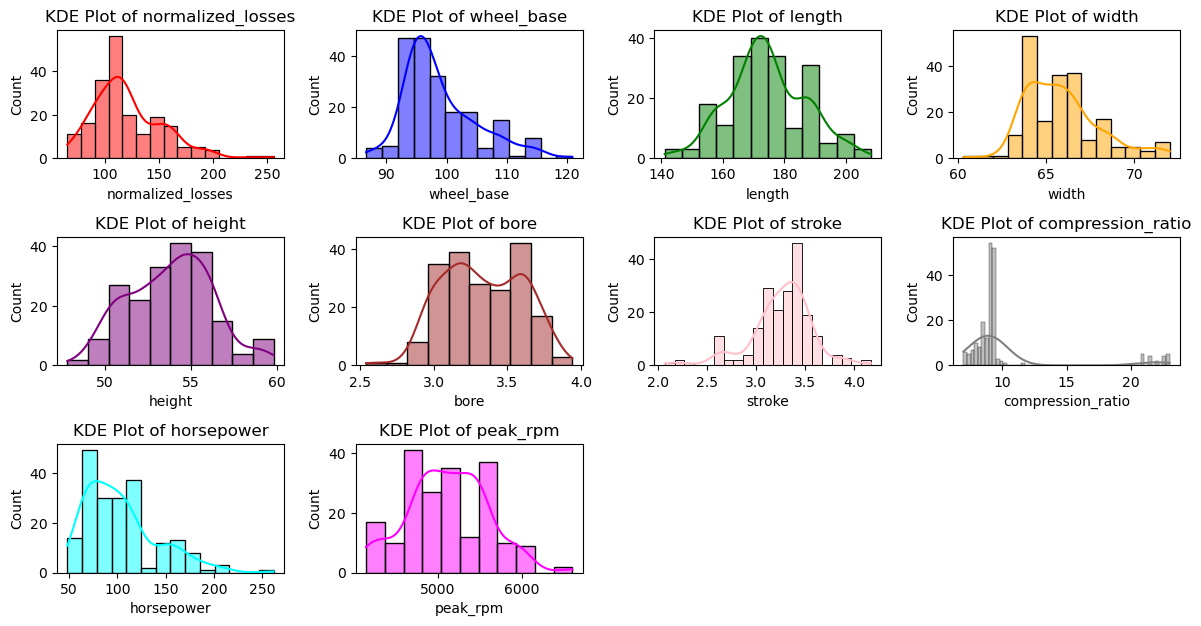

In [23]:
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'yellow', 'black']

plt.figure(figsize=(12, 8))

for i, (column, color) in enumerate(zip(num_cont, colors), 1):
    plt.subplot(4, 4, i)
    sns.histplot(app[column], fill=True, color=color, kde=True)
    plt.title(f'KDE Plot of {column}')

plt.tight_layout()
plt.show()

### <u>Insights:</u>

- The distribution of <u>wheelbase</u> values are positively skewed. There is a higher concentration of cars with values 93.70, 94.50, and 95.70 wheelbase measurements,also has variability in the dataset with several different measurements occurring less frequently and having diversity in the types of cars represented in the data.
- The values 157.3 and 188.8 are the most common car <u>length</u>, indicates a relatively symmetric distribution with a slight rightward (positive) skew. This means that while the majority of cars have lengths concentrated around the mean, there are also some cars with longer lengths.
- The values 63.8 and 66.5 are the most common car <u>width</u>, several different width measurements occurring less frequently, the distribution of car width values is skewed towards higher values, with some cars having wider widths.
- The distribution of the <u>'height'</u> feature is nearly symmetrical.
- The 'compression_ratio' column represents the compression ratio of an engine in an automobile.The most common compression ratio in the dataset is 9.0, Some compression ratios appear less frequently, with counts of 1 or 2,  positively skewed distribution seems that there might be a few instances with extremely high compression ratios. 

### 7.2 <u>Univariate analysis of Numerical-Discrete Columns:</u>

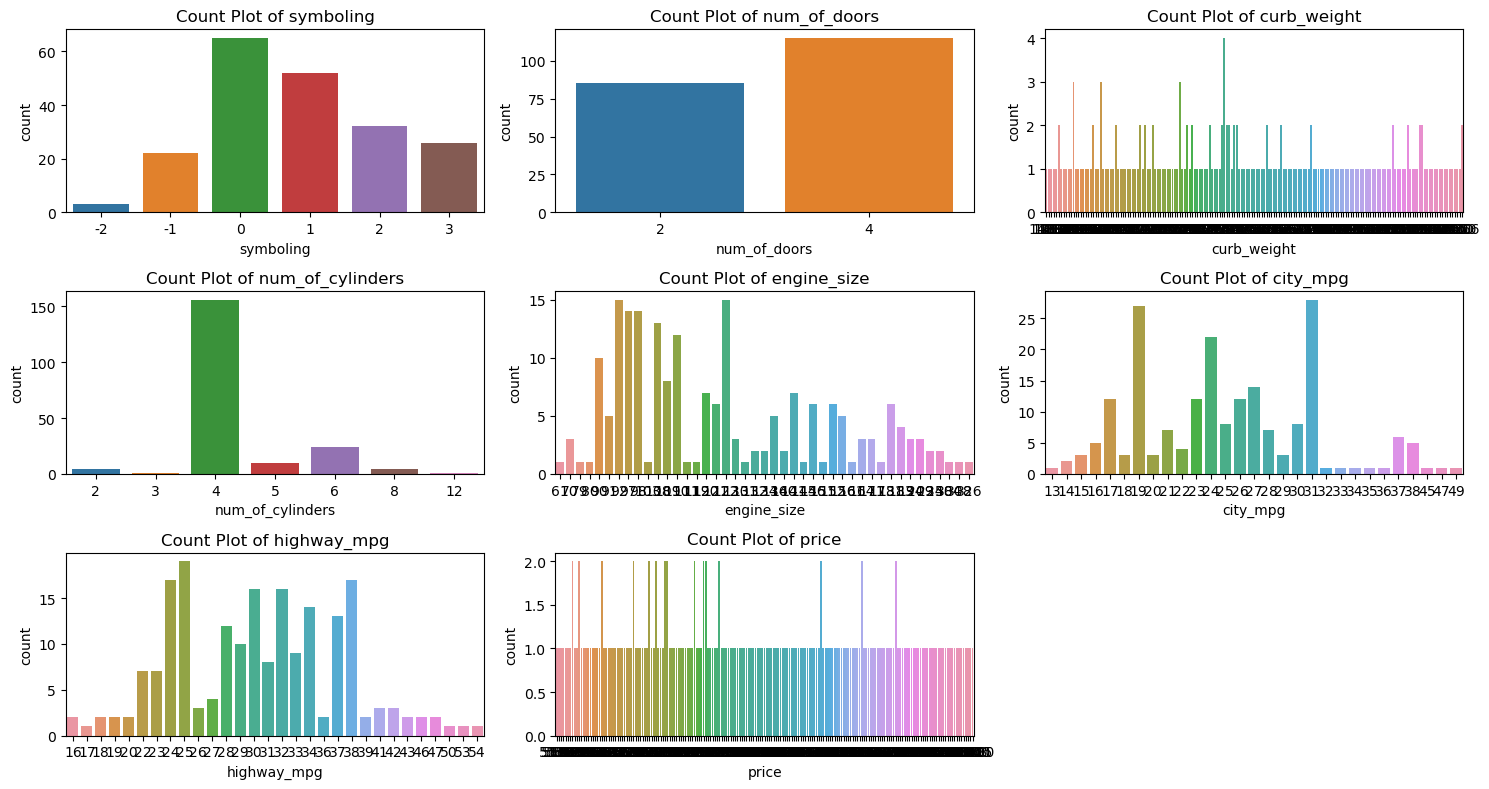

In [19]:
plt.figure(figsize=(15, 8))

for i, column in enumerate(num_disc, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=app, x=column)
    plt.title(f'Count Plot of {column}')

plt.tight_layout()
plt.show()

### <u>Insights:</u>
- The relatively symmetrical distribution and the presence of both positive and negative ratings suggest a diverse set of cars with varying risk levels in the dataset.
- The dataset is dominated by cars with 4 doors, which is a common configuration for sedans and some SUVs. Cars with 2 doors are also present but less frequent. This configuration is often found in sports cars and smaller coupes.
- Curb weight is a crucial factor in determining a car's performance, fuel efficiency, and handling. It represents the weight of the car without any occupants or cargo. The most common curb weight in the dataset is 2385, occurring 4 times.There are multiple curb weights with a count of 3, including values such as 1918, 2275, and 1989.
- The most common configuration in the dataset is a 4-cylinder engine,second most common configuration is a 6-cylinder engine.
- The dataset contains cars with a variety of prices, and some prices are more common than others, prices like 16500, 7775, 7295, etc., are repeated, seems that multiple cars share these specific price points.

### 7.3 <u>Univariate Analysis of Categorical columns:</u>

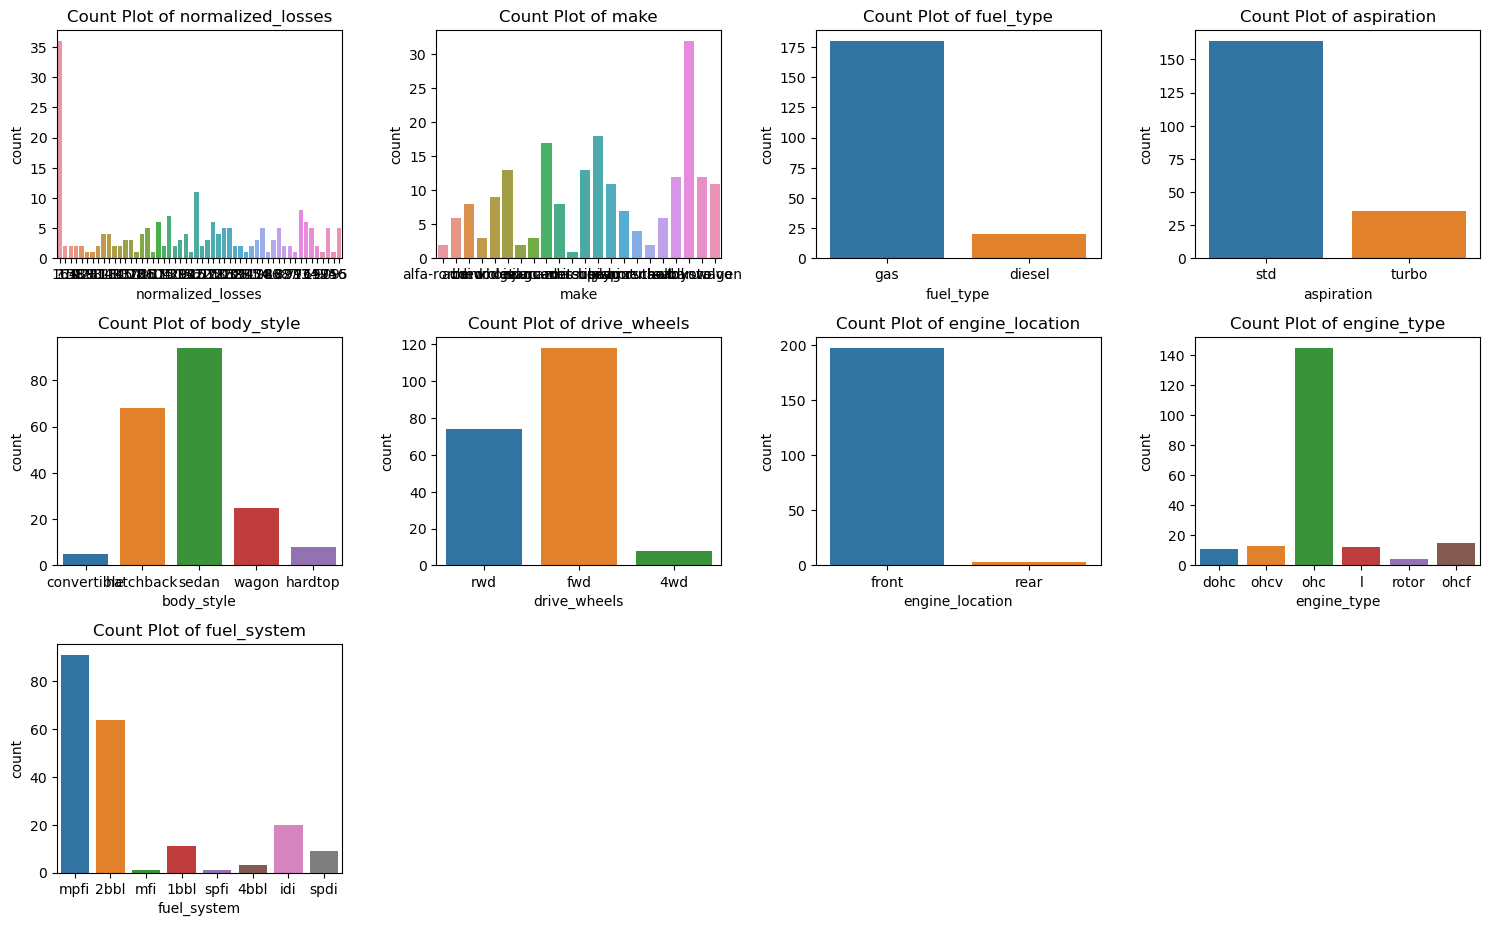

In [20]:
plt.figure(figsize=(15, 12))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=app, x=column)
    plt.title(f'Count Plot of {column}')

plt.tight_layout()
plt.show()

### <u>Insights:</u>
- The 'make' column represents the brand or manufacturer of the cars in the dataset. 32 cars from the Toyota brand, followed with Nissan, Mazda, Mitsubishi, Honda, Volkswagen, and other brands.
- The 'fuel_type' column indicates the type of fuel used by the cars in the dataset,majority(180) of cars using gasoline, and a smaller(20) number using diesel.
- The 'aspiration' column indicates whether the cars have a standard (std) aspiration or a turbocharged (turbo) aspiration, majority(164) having standard aspiration and a smaller(36)number having turbocharged.
- There are 94 cars with a sedan body style, foloowed with Hatchback(68 cars), Wagon(25 cars), Hardtop(8 cars) and Convertible(5cars).
- The distribution of cars based on their drive wheel configuration, with front-wheel drive being the most common, followed by rear-wheel drive and four-wheel drive.
- The 'engine_location' column indicates the location of the car's engine, the majority(197) of cars in the dataset have their engines located at the front, while only a small(3) number have rear-engine configurations.
- The 'engine_type' column describes the type of engine in the cars.There are 145 cars with Overhead Camshaft engines(ohc),ohcf (Overhead Camshaft Front)15 cars, ohcv (Overhead Camshaft Valve)13 cars, l (L Engine)12 cars , dohc (Double Overhead Camshaft) 11 cars, 4 cars with rotor engines.
- The 'fuel_system' column describes the type of fuel system used in the cars. 

### 7.4 <u>Bivariate Analysis of Continuous columns:</u>

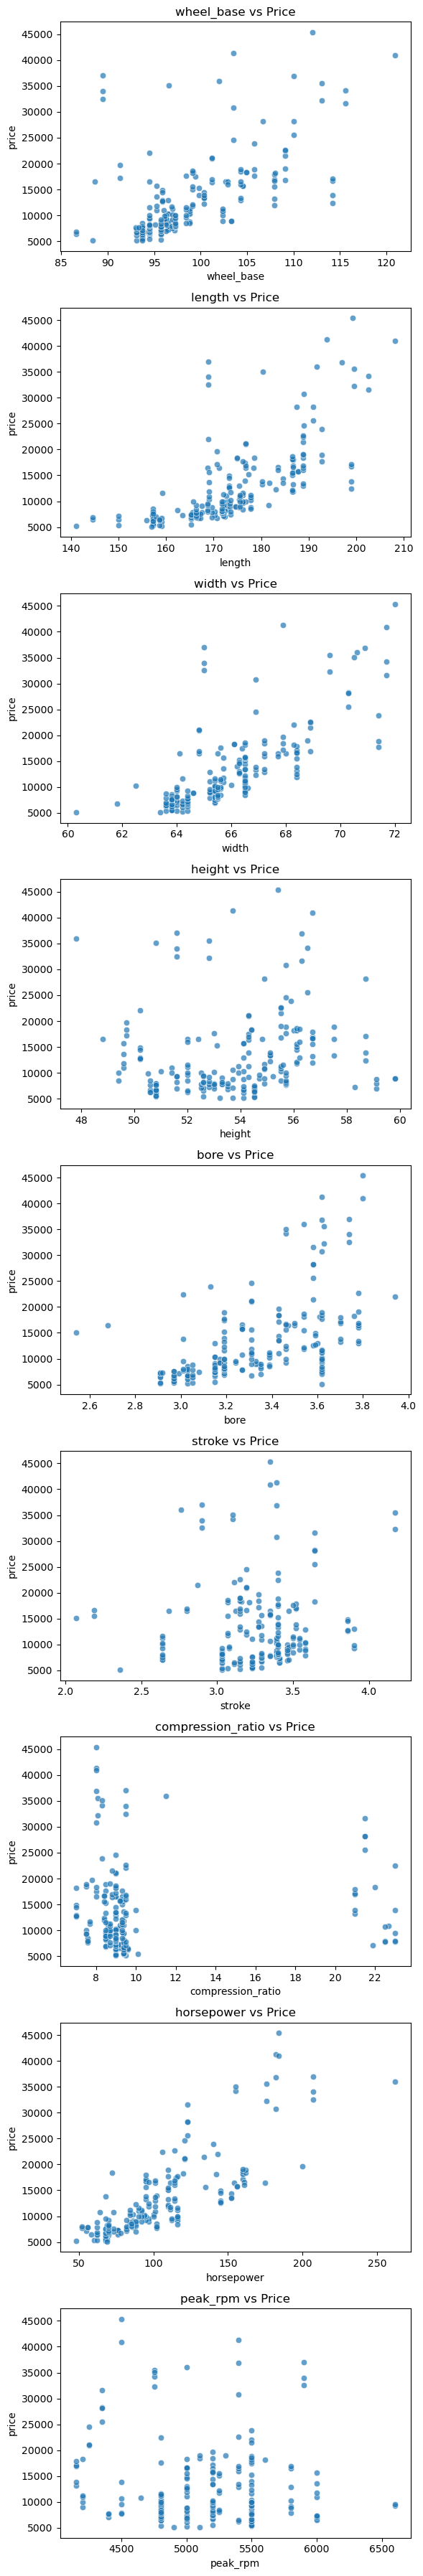

In [21]:
#  Set up subplots
fig, axes = plt.subplots(nrows=len(num_cont), ncols=1, figsize=(6, 4 * len(num_cont)))

# Iterate over continuous columns and create scatter plots
for i, column in enumerate(num_cont):
    sns.scatterplot(x=app[column], y=app['price'], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{column} vs Price')

plt.tight_layout()
plt.show()

### <u>Insights:</u>
- These distribution checks are with respect to target variable i.e price.
- Normalied losses are clustered more around 10000 t0 17000 price of car.
- varied distribution of measurements can be seen, but more clustered around 94 to 97 of wheel-base measurement, with a pricing range of 5000 to 15000.
- length of the car is 165 to 190, more around the car price of 5000 to 15000 dollar.
- with a pricing range of 5000 to 15000, most common width measurement found to be 64 to 68.
- Price range of 5000 to 15000, shares most common height of car belongs to 50 to 56.
- All the other features are also can be seen more clustered around car price of 5000 to 15000$.


### 7.5 <u>Bivariate Analysis of Numerical-discrete columns:</u>

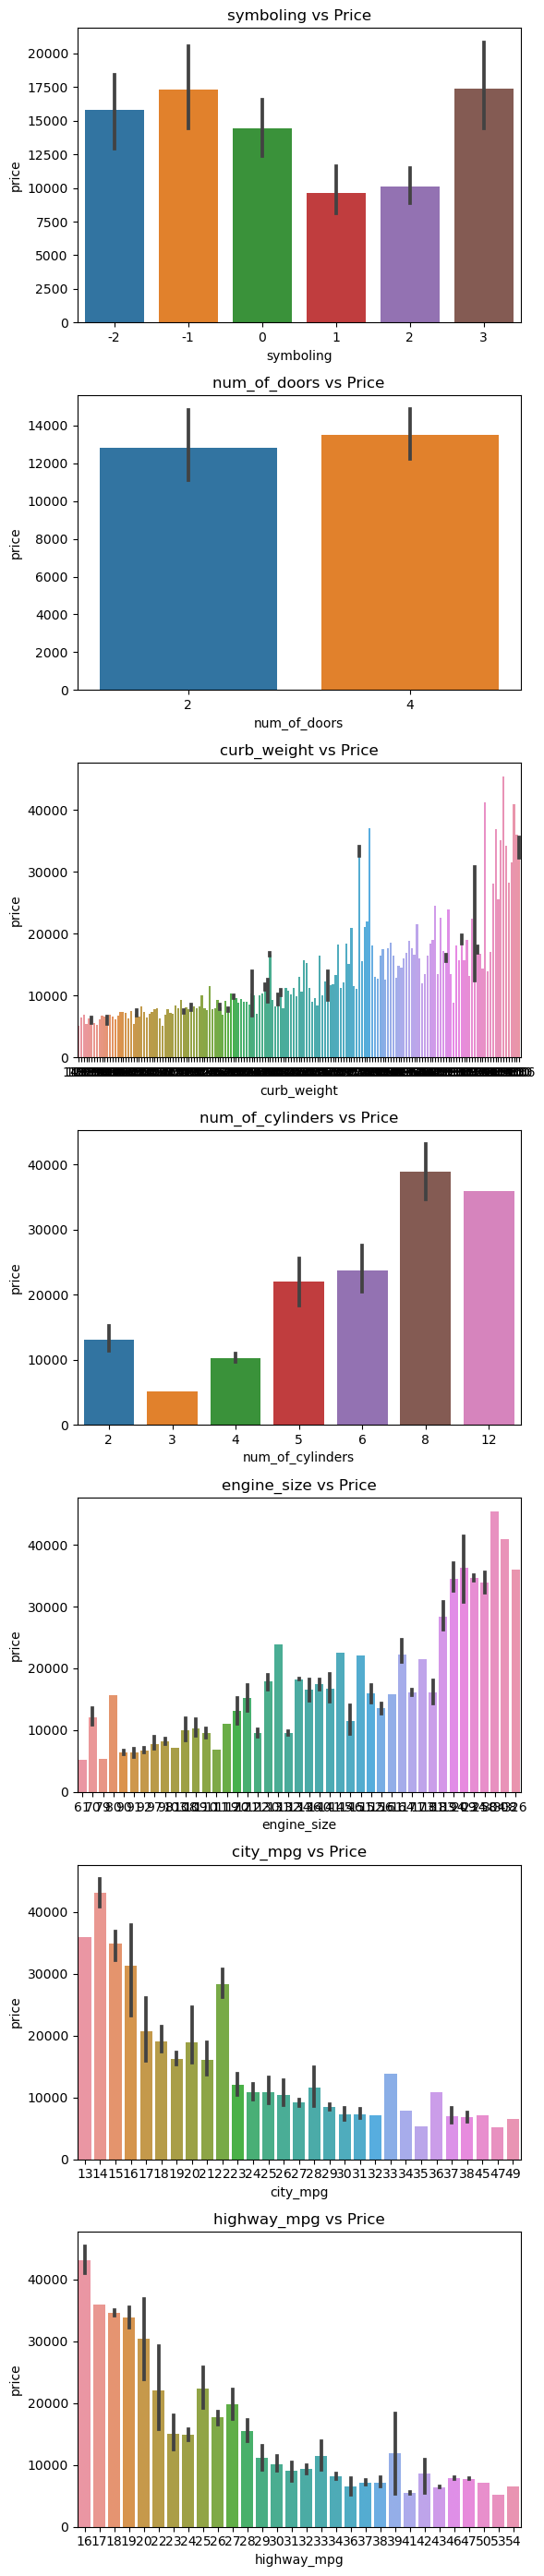

In [22]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(num_disc) - 1, ncols=1, figsize=(6, 4 * (len(num_disc) - 1)))

# Iterate over discrete columns (excluding 'price') and create bar plots
for i, column in enumerate(num_disc[:-1]):
    sns.barplot(x=app[column], y=app['price'], ax=axes[i])
    axes[i].set_title(f'{column} vs Price')

plt.tight_layout()
plt.show()

### <u>Insights:</u>
- Wide distribution of symboling represents 13000 to 17500 priced car having lower risk, on the other hand some car priced of 17500 having high risk.
- Car priced around 12500 have 2 doors, and around price 13000 has 4 no. of doors in car.
- With price curb weight is also increasing, most around high priced cars, 40000.
- Slightly linear relationship, higher no. of cylinders in costly car,specifically 8 is surpassing 12 no. of cylinders, with most of the presence in high priced car.

### 7.6 <u>Bivariate Analysis of Categorical columns:</u>

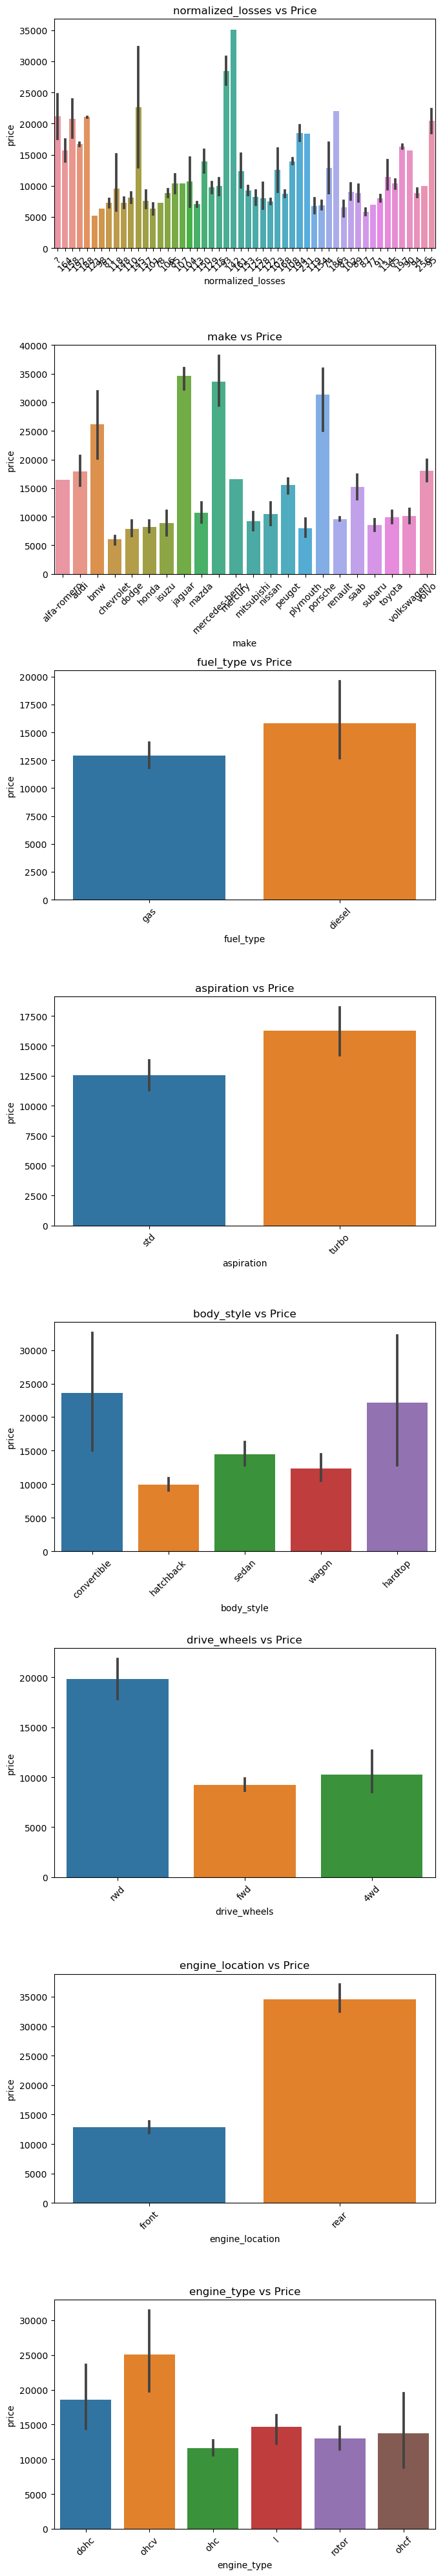

In [23]:
# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns) - 1, ncols=1, figsize=(7, 5 * (len(categorical_columns) - 1)))

# Iterate over categorical columns (excluding 'price') and create bar plots
for i, column in enumerate(categorical_columns[:-1]):
    sns.barplot(x=app[column], y=app['price'], ax=axes[i])
    axes[i].set_title(f'{column} vs Price')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

### Insights:
- By visualizing it can be seen Jaguar being the most costly car, followed with Mercedes-benz, BMW and plymouth as per data given in our dataset.
- Diesel car are comparatively costly.
- Turbocharged car shares costly price range as compared to std.
- Convertible body style of car are more costly followed with hardtop body style.
- Drive wheel of RWD are costly as compared to other drive wheel category.
- Engine location of Rear found to be more costly.
- Engine type of ohcv are costly followed with dohc.

### 7.7 <u>Multivariate Analysis for Numerical-Continuous Features:</u>

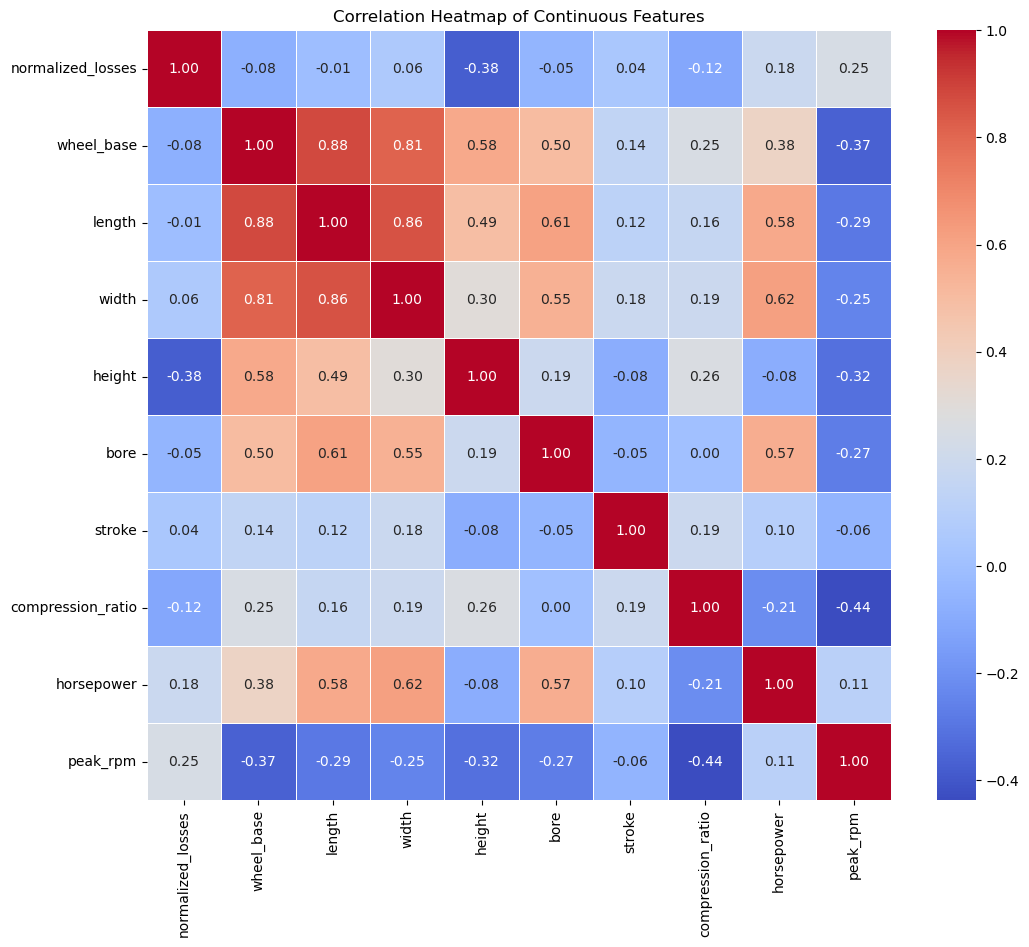

In [24]:
# Calculate the correlation matrix
correlation_matrix = app[num_cont].corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of Continuous Features')
plt.show()

### <u>Insights:</u>
- Wheel Base, Length, and Width, these three features show strong positive correlations with each other, but as per domain knowledge i know these can impact in prediction, so keeping these coloumns during the training of model.
- Also experimented by dropping these column, but found the performance was poor, so decided to keep the features.

### 7.8 <u>Multivariate analysis for Discrete Columns:</u>

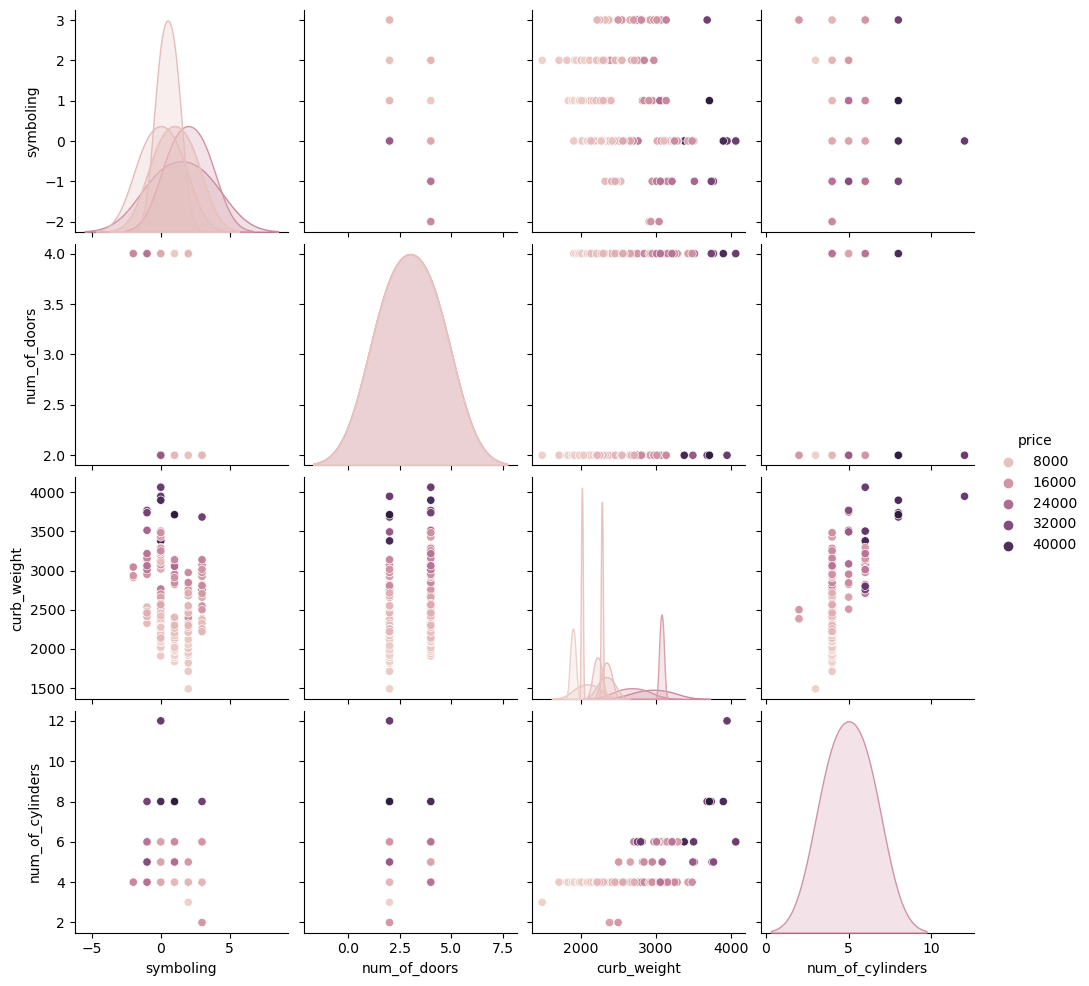

In [25]:
sns.pairplot(app, vars=['symboling', 'num_of_doors', 'curb_weight', 'num_of_cylinders'], hue='price', diag_kind='kde')
plt.show()

## 8. Task1- <u>Complete Data Analysis Report:</u>

<u>Introduction:</u>
The dataset contains information related to automobile characteristics, including various features such as symboling, normalized losses, make, fuel type, dimensions, weight, performance metrics, and fuel efficiency. The target variable is the price of the car, making it a regression problem.

1. Symboling: Represents the risk factor of the car. Positive values indicate a higher risk, while negative values indicate a lower risk. Cars in the dataset predominantly have positive ratings, interprets a higher risk.
2. Dimensions: Wheelbase, length, width, and height provide insights into the car's size. The dataset includes a diverse range of car sizes. The distribution of these dimensions varies, influencing manufacturing costs and market positioning.
3. Weight and Performance: Curb weight, horsepower, peak RPM, and compression ratio impact performance. Curb weight has a diverse distribution, influencing the car's handling and efficiency. Horsepower and peak RPM have moderately positively skewed distributions.
4. Fuel Efficiency: City and highway MPG provide information on fuel efficiency. 
5. Price: The target variable, car price, exhibits a wide range. The distribution of prices is influenced by various factors, including dimensions, weight, and performance metrics.

<u>Insights and Recommendations:</u>
- Symboling: Management can use symboling to understand the safety profile of different car models.
- Normalized Losses: Address "?" values through imputation or removal for accurate risk assessment.
- Make: Analyze pricing strategies based on different manufacturers.
- Fuel Type and Aspiration: Consider market demands and environmental factors in pricing.
- Number of Doors, Body Style, and Drive Wheels: Understand how these features influence design, functionality, and pricing.
- Engine Characteristics: Optimize designs based on engine features and target specific market segments.
- Vehicle Dimensions: Consider the impact of size on manufacturing costs and market positioning.
- Weight and Performance: Optimize curb weight, horsepower, and compression ratio for better performance.
- Fuel Efficiency: Consider consumer preferences and environmental concerns in pricing.

<u>Price Analysis:</u>
- Normalized Losses and Price: Cars with normalized losses clustered around 10000 to 17000 have varying prices.
- Dimensions and Price: Various dimensions influence the pricing, with the most common ranges around 5000 to 15000.
- Curb Weight and Price: Higher-priced cars tend to have higher curb weight.
- Number of Cylinders and Price: Costlier cars often have more cylinders, especially 8-cylinder configurations.
- Fuel Type and Price: Diesel cars are relatively more expensive.
- Aspiration and Price: Turbocharged cars are costlier than standard ones.
- Body Style and Price: Convertible and hardtop styles are more expensive.
- Drive Wheels and Price: Rear-wheel-drive (RWD) cars are generally more costly.
- Engine Location and Price: Cars with rear engine location are priced higher.
- Engine Type and Price: Overhead Camshaft Valve (ohcv) engines are costlier.
- City and Highway MPG: Both have a strong positive correlation; one may be dropped to avoid multicollinearity.

<u>Conclusion:</u>
#### In-depth analysis of the dataset provides valuable insights for strategic decision-making in the automobile industry. Understanding the impact of various features on car pricing allows for optimized designs, targeted marketing, and competitive pricing strategies, contributing to a competitive advantage in the market. Addressing missing values, handling categorical variables, and identifying outliers are essential steps for robust model development, which will look forward.

## 9. <u>Data Preprocessing</u>
- Outliers will  be handled here and other preprocessing steps like encoding and scaling techniques will be done after splitting dataset into train and test data for avoiding data leakage, and building more accurate model for production stage.

### <u> 9.1 Outliers Detection and handling:</u>

#### 9.1.1 <u>Checking for outliers</u>

In [43]:
#  Calculate percentage of outliers in each numerical column
outlier_percentage_dict = {}

for column in numerical_columns:
    # Get the column values
    column_values = app[column]

    # Calculate IQR
    Q1 = column_values.quantile(0.25)
    Q3 = column_values.quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((column_values < lower_bound) | (column_values > upper_bound)).sum()

    # Calculate percentage of outliers
    percentage_outliers = (num_outliers / len(column_values)) * 100

    # Store the result in the dictionary
    outlier_percentage_dict[column] = percentage_outliers

# Display the results
for column, percentage in outlier_percentage_dict.items():
    print(f"Percentage of outliers in {column}: {percentage:.2f}%")

Percentage of outliers in wheel_base: 0.00%
Percentage of outliers in length: 0.00%
Percentage of outliers in width: 5.50%
Percentage of outliers in height: 0.00%
Percentage of outliers in bore: 0.00%
Percentage of outliers in stroke: 12.00%
Percentage of outliers in compression_ratio: 13.50%


#### If the outliers are less than 5%, only in that case we will handle outliers, else it will not make sense for any kind of imputation.

In [44]:
# Define a threshold for the percentage of outliers
threshold_percentage = 5.0
# Separate columns with outliers less than or equal to 5% and more than 5%
outliers_below_threshold = {column: percentage for column, percentage in outlier_percentage_dict.items() if percentage <= threshold_percentage}
outliers_above_threshold = {column: percentage for column, percentage in outlier_percentage_dict.items() if percentage > threshold_percentage}

# Display the results
print(f"Columns with outliers less than or equal to {threshold_percentage}%:")
print(outliers_below_threshold)

print(f"\nColumns with outliers more than {threshold_percentage}%:")
print(outliers_above_threshold)

Columns with outliers less than or equal to 5.0%:
{'wheel_base': 0.0, 'length': 0.0, 'height': 0.0, 'bore': 0.0}

Columns with outliers more than 5.0%:
{'width': 5.5, 'stroke': 12.0, 'compression_ratio': 13.5}


#### 9.1.2 <u>Handling Outliers</u>

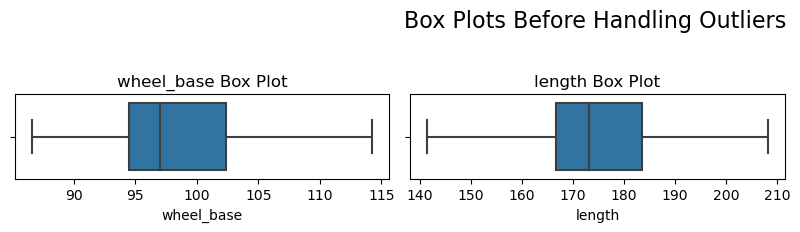

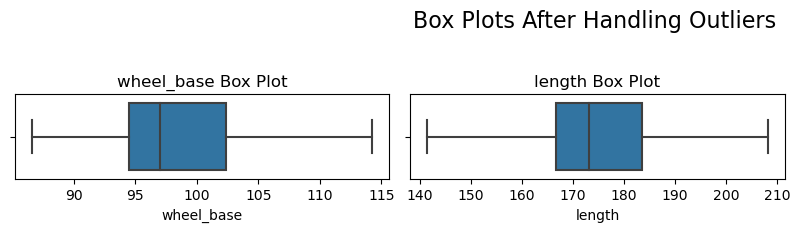

In [49]:
# Define a threshold for the percentage of outliers
threshold_percentage = 5.0

# Columns with outliers less than or equal to 5%
outliers_below_threshold = {'wheel_base': 1.5, 'length': 0.5,}

# Visualize box plots before handling outliers
plt.figure(figsize=(12, 6))
plt.suptitle('Box Plots Before Handling Outliers', y=1.02, fontsize=16)

for i, column in enumerate(outliers_below_threshold.keys(), 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=app, x=column)
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

# Handle outliers only in specified columns with less than or equal to 5% outliers
for column, percentage in outliers_below_threshold.items():
   
    # Calculate IQR for the specified column
    Q1 = app[column].quantile(0.25)
    Q3 = app[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the values at the bounds
    app[column] = app[column].clip(lower=lower_bound, upper=upper_bound)

# Visualize box plots after handling outliers
plt.figure(figsize=(12, 6))
plt.suptitle('Box Plots After Handling Outliers', y=1.02, fontsize=16)

for i, column in enumerate(outliers_below_threshold.keys(), 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=app, x=column)
    plt.title(f'{column} Box Plot')

plt.tight_layout()
plt.show()

## 10. <u> Train-Test Split</u>
- Generally, missing values and outlier handling are often considered as part of the data preprocessing stage.
- Applying transformations after splitting the data is a good practice to avoid data leakage.
- It's crucial to ensure consistency in encoding between the training and testing sets to avoid data leakage and obtain reliable model evaluation metrics.
- These steps are performed on the entire dataset, and they are essential for ensuring the data's quality and removing noise that might affect the model's performance.
- Tasks like encoding (e.g., one-hot encoding/ frequency encoding, label encoding) and scaling are typically applied after the train-test split. The primary reason for this is to avoid any data leakage from the test set into the training set. If we perform these transformations on the entire dataset before splitting, information from the test set might influence the transformation in a way that can lead to overfitting or optimistic performance estimates.


In [62]:
from sklearn.model_selection import train_test_split
# We will use sklearn train-test-split and convert the base dataset to train and test dataset with 75% and 25% split.
train, test = train_test_split(app, test_size=0.25, random_state=19)
print("Train data size is: ", train.shape)
print("Test data size is: ", test.shape)

Train data size is:  (150, 26)
Test data size is:  (50, 26)


In [63]:
# Separate features (X) and target (y) for both training and testing sets
X_train = train.drop('price', axis=1)
y_train = train['price']
print("X-train data size is: ", X_train.shape)
print("y-train data size is: ", y_train.shape)

X_test = test.drop('price', axis=1)
y_test = test['price']
print("*"*35)
print("X-test data size is: ", X_test.shape)
print("y-test data size is: ", y_test.shape)



X-train data size is:  (150, 25)
y-train data size is:  (150,)
***********************************
X-test data size is:  (50, 25)
y-test data size is:  (50,)


## 11. <u>Encoding Categorical Variables</u>

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['make', 'fuel_type', 'aspiration', 'body_style', 'drive_wheels',
       'engine_location', 'engine_type', 'fuel_system'],
      dtype='object')


## 11.1 <u>Label Encoding:</u>

In [65]:
# Label Encoding for 'fuel' and 'asp'
le = LabelEncoder()
X_train['fuel_type'] = le.fit_transform(X_train['fuel_type'])
X_test['fuel_type'] = le.transform(X_test['fuel_type'])

X_train['aspiration'] = le.fit_transform(X_train['aspiration'])
X_test['aspiration'] = le.transform(X_test['aspiration'])

# Label Encoding for 'e_location'
X_train['engine_location'] = le.fit_transform(X_train['engine_location'])
X_test['engine_location'] = le.transform(X_test['engine_location'])

## 11.2 <u>Frequency Encoding</u>

In [66]:
# Frequency Encoding for selected columns
frequency_encoding_columns = ['make', 'body_style', 'drive_wheels', 'engine_type', 'fuel_system']

for column in frequency_encoding_columns:
    frequency_map = X_train[column].value_counts(normalize=True).to_dict()
    
    # Create new frequency-encoded column
    X_train[column + '_freq_encoded'] = X_train[column].map(frequency_map)
    X_test[column + '_freq_encoded'] = X_test[column].map(frequency_map)
    
    # Drop the original column
    X_train.drop(column, axis=1, inplace=True)
    X_test.drop(column, axis=1, inplace=True)

In [ ]:
X_train.sample(5)

## 12. <u>Feature Scaling:</u>
- Scaling all the Numerical Continuous Variables, which helps Machine learning model to train in an efficient way and hence results in an increased accuracy.

In [68]:
# Retrieve unique values for each selected column
unique_values_per_column = {column: app[column].unique() for column in numerical_columns}

# Display the results
for column, unique_values in unique_values_per_column.items():
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for wheel_base:
[ 88.6   94.5   99.8   99.4  105.8  101.2  103.5  110.    88.4   93.7
 103.3   95.9   86.6   96.5   94.3   96.   113.   102.    93.1   95.3
  98.8  104.9  106.7  114.25  96.6  112.   102.7   93.    96.3   95.1
  97.2  100.4   91.3   99.2  107.9  114.2  108.    89.5   96.1   99.1
  93.3   97.    96.9   95.7   98.4  102.4  102.9  104.5   97.3  104.3
 109.1 ]

Unique values for length:
[168.8    171.2    176.6    177.3    192.7    176.8    189.     193.8
 197.     141.4375 155.9    158.8    157.3    174.6    173.2    144.6
 150.     163.4    157.1    167.5    175.4    169.1    170.7    172.6
 199.6    191.7    159.1    166.8    169.     177.8    175.     190.9
 187.5    202.6    180.3    208.1    199.2    178.4    173.     172.4
 165.3    170.2    165.6    162.4    173.4    181.7    184.6    178.5
 186.7    198.9    167.3    168.9    181.5    186.6    156.9    157.9
 172.     173.5    173.6    158.7    169.7    166.3    168.7    176.2
 175.6    183.5    187.8

## 12.1 <u>Robust Scaling:</u>
- As we have only dealt with outliers which were less than 5% of overall, and remaining is kept to avoid of any loss of important data, in this scenario Robust Scaling technique is suitable.
- Robust Scaling is a method of scaling features in a dataset that is less sensitive to the presence of outliers compared to standard scaling methods like Min-Max scaling or Z-score scaling. It uses statistics that are more robust to outliers.


In [69]:
from sklearn.preprocessing import RobustScaler

# Assuming you have X_train and X_test DataFrames

# List of numerical columns to be scaled
numerical_columns = ['wheel_base', 'length', 'width','height',
                     'bore','stroke','compression_ratio']

# Initialize the RobustScaler
robust_scaler = RobustScaler()

# Fit and transform the training data
X_train[numerical_columns] = robust_scaler.fit_transform(X_train[numerical_columns])

# Transform the test data using the same scaler
X_test[numerical_columns] = robust_scaler.transform(X_test[numerical_columns])

### Feature Selection

- As Feature selection method by filter method, by using SelectKBest, decreased the performance of model, after we eliminate less important features, so deciding not to go further with this step.
- Experimented by selecting k value from 25 to 15, this activity shows degraded score with every eliminated feature from our datasets.
- Also performed Feature Selection by sorrelation method by dropping the columns which was slightly correlated, that too decreased the performance, so skipping to drop any of the column.
- RFE technique is also used but no improvement found out of it.

In [88]:
X_train.sample(5)

,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,engine_location,wheel_base,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,make_freq_encoded,body_style_freq_encoded,drive_wheels_freq_encoded,engine_type_freq_encoded,fuel_system_freq_encoded
36,0,106.0,1,0,2,0,-0.068493,2289,4,110,-0.365714,1.026549,0.000000,86.0,5800.0,27,33,0.046667,0.360000,0.58,0.68,0.040000
49,1,113.0,1,0,4,0,-0.534247,1945,4,91,-0.640000,-0.495575,0.000000,68.0,5000.0,31,38,0.080000,0.466667,0.58,0.68,0.306667
194,-1,74.0,1,1,4,0,1.000000,3157,4,130,0.708571,-0.495575,-1.714286,162.0,5100.0,17,22,0.040000,0.100000,0.38,0.68,0.473333
119,-1,74.0,1,0,4,0,0.863014,2535,4,122,0.091429,0.601770,-0.571429,88.0,5000.0,24,30,0.040000,0.100000,0.58,0.68,0.306667
188,0,115.0,1,0,4,0,0.465753,2563,4,109,-0.274286,0.389381,0.000000,88.0,5500.0,25,31,0.073333,0.100000,0.58,0.68,0.473333


## 13. <u>Model Building:</u>
#### <u>Strategy:</u>
For the model building, we have to consider many factors. Our target for the model is to predict price of car. To achieve this, we need to build our models to maximize R2 Score as much as possible. As the management will assess all the risks involved, design consideration during manufacturing, and pricing scheme, so using regression models will try to predict the prices of car for an efficient production in an optimised way.

For model building we will be using following different models:

1. Linear Regression
2. ElasticNet Regression
3. Random Forest Regressor
4. XGBOOST Regressor
5. KNN Regressor
6. Gradient Boosting Regressor
7. ADABOOST Regressor

We will be training the model with and without Hyper-Parameter Tuning using GridSearchCV method to derive the final models in each type and comparing the results and then will confirm, which will be best performing among all the models for production . Also, let's perform cross-validation for better model evaluation.

## 13.1 <u>Linear Regression</u>

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# We have your X_train, y_train, X_test, y_test datasets

# Initialize Linear Regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lin_reg.predict(X_train)

# Make predictions on the test set
y_test_pred = lin_reg.predict(X_test)

# Evaluate the model on training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print evaluation metrics for training set
print("Training Set Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

# Print evaluation metrics for test set
print("\nTesting Set Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)


Training Set Metrics:
Mean Squared Error: 5935050.187553188
Mean Absolute Error: 1928.8329348375062
R-squared: 0.9118502754971213

Testing Set Metrics:
Mean Squared Error: 11219955.417095818
Mean Absolute Error: 2316.464090005669
R-squared: 0.7737279957853163


### 13.1.1 <u>Cross Validation(LR):</u>

In [74]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(lin_reg, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [-0.01229861  0.85175814  0.83439562  0.75381962  0.74892774]
Mean R2 Score: 0.6353205023113964
Standard Deviation of R2 Scores: 0.32644611039923926


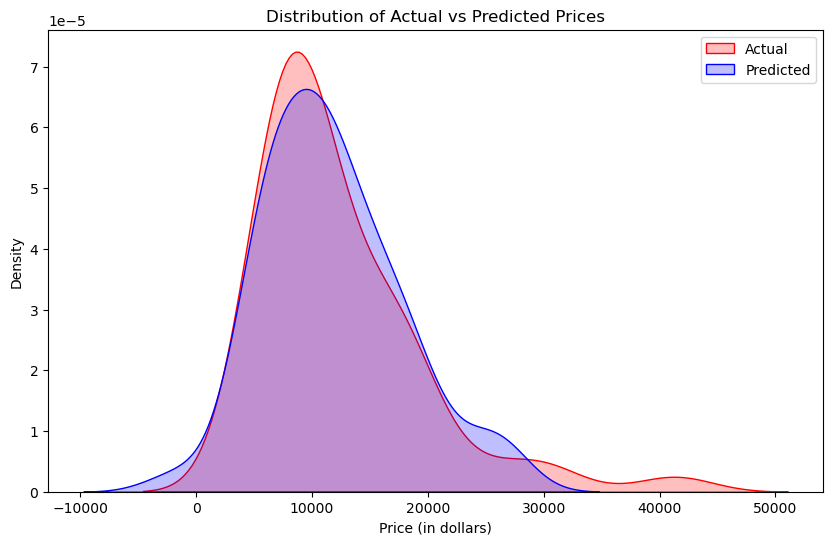

In [75]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the actual distribution
sns.kdeplot(y_test, color="r", label='Actual', fill=True)

# Plot the predicted distribution
sns.kdeplot(y_test_pred, color="b", label='Predicted', fill=True)

# Set plot title and labels
plt.title('Distribution of Actual vs Predicted Prices')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

### <u>Insights</u>
- The model performs well on the training set, as indicated by a high R-squared value of 0.9119, seems that the model explains approximately 91.19% of the variance in the training data.
- Model also generalizes reasonably well to the testing set, with an R-squared value of 0.7737.
- The training set R-squared is higher than the testing set R-squared, which is expected. The model performs well on both sets, but there might be a slight overfitting tendency.
- The standard deviation of cross-validation scores is relatively high (0.3264), indicating some variability in performance across different folds, it may be worthwhile to explore more advanced models to enhance model stability.

## 14. <u>ElasticNet Regression</u>
- Elastic Net Regression is a regularization technique that combines both L1 (Lasso) and L2 (Ridge) regularization penalties in the linear regression model. It is particularly useful when dealing with datasets with high multicollinearity. The elastic net penalty is controlled by two parameters, alpha and l1_ratio, so let's evaluate performance on our datasets.

In [76]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# We have your X_train, y_train, X_test, y_test datasets

# Initialize ElasticNet model
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # You can adjust alpha and l1_ratio as needed

# Train the model
elastic_net.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_elastic = elastic_net.predict(X_train)

# Make predictions on the test set
y_test_pred_elastic = elastic_net.predict(X_test)

# Evaluate the model on training set
mse_train_elastic = mean_squared_error(y_train, y_train_pred_elastic)
mae_train_elastic = mean_absolute_error(y_train, y_train_pred_elastic)
r2_train_elastic = r2_score(y_train, y_train_pred_elastic)

# Evaluate the model on test set
mse_test_elastic = mean_squared_error(y_test, y_test_pred_elastic)
mae_test_elastic = mean_absolute_error(y_test, y_test_pred_elastic)
r2_test_elastic = r2_score(y_test, y_test_pred_elastic)

# Print training metrics
print("ElasticNet Training Metrics:")
print("Mean Squared Error:", mse_train_elastic)
print("Mean Absolute Error:", mae_train_elastic)
print("R-squared:", r2_train_elastic)

# Print testing metrics
print("\nElasticNet Testing Metrics:")
print("Mean Squared Error:", mse_test_elastic)
print("Mean Absolute Error:", mae_test_elastic)
print("R-squared:", r2_test_elastic)

ElasticNet Training Metrics:
Mean Squared Error: 9512144.09398111
Mean Absolute Error: 2300.353395385815
R-squared: 0.8587218549432687

ElasticNet Testing Metrics:
Mean Squared Error: 10201064.442605598
Mean Absolute Error: 2192.8198326582046
R-squared: 0.7942758940882696


## 14.1 <u>Cross Validation(ElasticNet)</u>

In [77]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(elastic_net, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.7680317  0.76541395 0.88645656 0.72772916 0.70202716]
Mean R2 Score: 0.769931705948676
Standard Deviation of R2 Scores: 0.06323629311147283


## 14.2 <u>Hyperparameter tuning</u>

In [79]:
# Define the hyperparameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]
}

# Initialize the ElasticNet model
elasticnet_model = ElasticNet(random_state=19)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'alpha': 10, 'l1_ratio': 0.9}


In [80]:
# Define the best hyperparameters
best_alpha = best_params['alpha']
best_l1_ratio = best_params['l1_ratio']

# Initialize the ElasticNet model with the best hyperparameters
best_elasticnet_model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, random_state=19)

# Train the model on the training set
best_elasticnet_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_elasticnet = best_elasticnet_model.predict(X_train)

# Evaluate the model on training data
mse_train_elasticnet = mean_squared_error(y_train, y_train_pred_elasticnet)
mae_train_elasticnet = mean_absolute_error(y_train, y_train_pred_elasticnet)
r2_train_elasticnet = r2_score(y_train, y_train_pred_elasticnet)

# Print training metrics
print("ElasticNet Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_elasticnet)
print("Training Mean Absolute Error:", mae_train_elasticnet)
print("Training R-squared:", r2_train_elasticnet)

# Make predictions on the testing set
y_test_pred_elasticnet = best_elasticnet_model.predict(X_test)

# Evaluate the model on testing data
mse_test_elasticnet = mean_squared_error(y_test, y_test_pred_elasticnet)
mae_test_elasticnet = mean_absolute_error(y_test, y_test_pred_elasticnet)
r2_test_elasticnet = r2_score(y_test, y_test_pred_elasticnet)

# Print testing metrics
print("\nElasticNet Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_elasticnet)
print("Testing Mean Absolute Error:", mae_test_elasticnet)
print("Testing R-squared:", r2_test_elasticnet)

ElasticNet Regression Training Metrics:
Training Mean Squared Error: 10214484.595398724
Training Mean Absolute Error: 2352.8688267745542
Training R-squared: 0.84829041464357

ElasticNet Regression Testing Metrics:
Testing Mean Squared Error: 10528385.48672057
Testing Mean Absolute Error: 2284.3216848699735
Testing R-squared: 0.7876748350002194


## 14.3 <u>Cross Validation after Hyperparameter Tuning</u>

In [51]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(best_elasticnet_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.75972859 0.85422256 0.84106973 0.66946476 0.67891057]
Mean R2 Score: 0.7606792433558616
Standard Deviation of R2 Scores: 0.07774327373912025


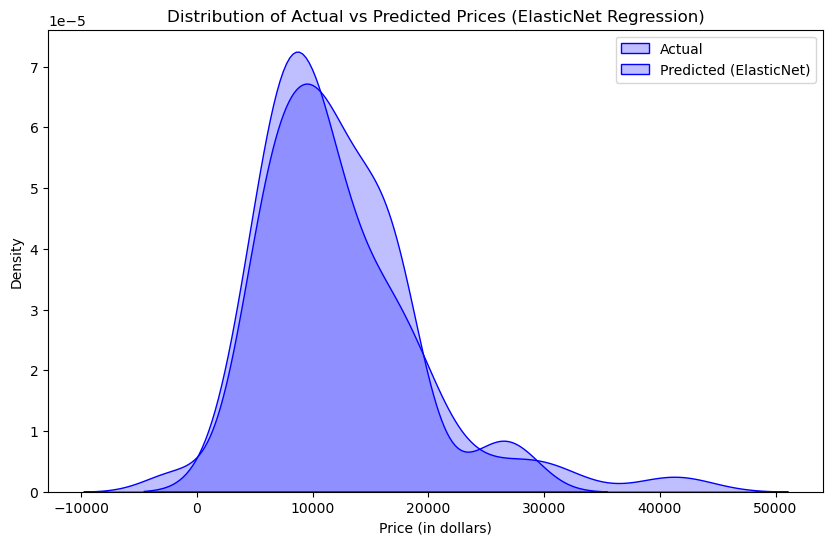

In [82]:
plt.figure(figsize=(10, 6))

# Plot the actual distribution
sns.kdeplot(y_test, color="b", label='Actual', fill=True)

# Plot the predicted distribution for ElasticNet
sns.kdeplot(y_test_pred_elasticnet, color="b", label='Predicted (ElasticNet)', fill=True)

# Set plot title and labels
plt.title('Distribution of Actual vs Predicted Prices (ElasticNet Regression)')
plt.xlabel('Price (in dollars)')
plt.ylabel('Density')

# Add legend
plt.legend()

# Show the plot
plt.show()

### <u>Insights:</u>
- The hyperparameter tuning process slightly affected the model's performance.
- The R-squared values, although slightly lower, still indicate good explanatory power.
- Cross-validation helps assess the model's robustness, and the standard deviation provides a measure of variability in performance across folds.
- The ElasticNet regression model, both before and after tuning, appears to be a reasonable choice for predicting the target variable.
- Considering the trade-off between model complexity and performance when deciding on the optimal hyperparameters. The tuned model may offer a more balanced performance on the test set and across different data subsets.


## 15. <u>Random Forest</u>

In [117]:
from sklearn.ensemble import RandomForestRegressor


# Assuming you have your X_train, y_train, X_test, y_test datasets

# Initialize Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=19)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model on training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Print training metrics
print("Random Forest Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_rf)
print("Training Mean Absolute Error:", mae_train_rf)
print("Training R-squared:", r2_train_rf)

# Make predictions on the test set
y_test_pred_rf = rf_model.predict(X_test)

# Evaluate the model on testing data
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

# Print testing metrics
print("\nRandom Forest Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_rf)
print("Testing Mean Absolute Error:", mae_test_rf)
print("Testing R-squared:", r2_test_rf)

Random Forest Regression Training Metrics:
Training Mean Squared Error: 644733.5296306841
Training Mean Absolute Error: 555.7450244444444
Training R-squared: 0.9904241613434202

Random Forest Regression Testing Metrics:
Testing Mean Squared Error: 4941014.554728403
Testing Mean Absolute Error: 1601.3331666666668
Testing R-squared: 0.9003549279305687


## 15.1 <u>Cross Validation(Random Forest)</u>

In [84]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.75340484 0.95002516 0.95240986 0.81409217 0.89392015]
Mean R2 Score: 0.8727704373762311
Standard Deviation of R2 Scores: 0.07803758591493065


## 15.2 <u>Perform Hyperparameter tuning</u>

### Selecting best hyperparameters

In [85]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=19)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [86]:
# Initialize Random Forest Regressor model with the best hyperparameters
best_rf_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=19
)

# Train the model on the training set
best_rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_rf = best_rf_model.predict(X_train)

# Evaluate the model on training data
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

# Print training metrics
print("Random Forest Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_rf)
print("Training Mean Absolute Error:", mae_train_rf)
print("Training R-squared:", r2_train_rf)

# Make predictions on the testing set
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the model on testing data
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print testing metrics
print("\nRandom Forest Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_rf)
print("Testing Mean Absolute Error:", mae_rf)
print("Testing R-squared:", r2_rf)

Random Forest Regression Training Metrics:
Training Mean Squared Error: 542237.4632850214
Training Mean Absolute Error: 509.93659690476176
Training R-squared: 0.9919464736618478

Random Forest Regression Testing Metrics:
Testing Mean Squared Error: 5702099.401759889
Testing Mean Absolute Error: 1401.7147521428572
Testing R-squared: 0.8850061865752474


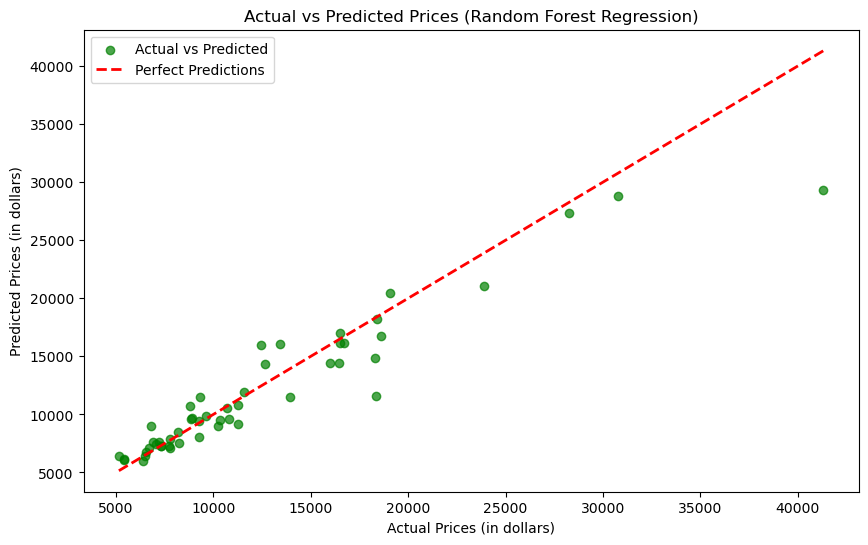

In [87]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for actual vs predicted values on the testing set
plt.scatter(y_test, y_pred_rf, color='g', alpha=0.7, label='Actual vs Predicted')

# Add a line for perfect predictions (y_test = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')

# Set plot title and labels
plt.title('Actual vs Predicted Prices (Random Forest Regression)')
plt.xlabel('Actual Prices (in dollars)')
plt.ylabel('Predicted Prices (in dollars)')

# Add legend
plt.legend()

# Show the plot
plt.show()

## 15.3 <u>Cross Validation after Hyperparameter Tuning</u>

In [88]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.82390033 0.94691478 0.9503036  0.82160621 0.88744752]
Mean R2 Score: 0.8860344885035385
Standard Deviation of R2 Scores: 0.05630378671654234


### <u>Insights:</u>
- The Random Forest model performed exceptionally well before hyperparameter tuning. The training R-squared indicates a high proportion of explained variance.
- Cross-validation shows good consistency in performance across different folds, with a relatively low standard deviation.
- The Random Forest regression model, both before and after tuning, demonstrates high predictive accuracy.
- The tuned model provides a good balance between complexity and performance.
- The model is likely to generalize well to new data, as indicated by its strong performance on the test set and cross-validation results.

## 16. <u>XGBOOST Regressor</u>

In [90]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# We have your X_train, y_train, X_test, y_test datasets

# Initialize XGBoost Regressor model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_xgb = xgb_model.predict(X_train)

# Evaluate the model on training data
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
mae_train_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)

# Print training metrics
print("XGBoost Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_xgb)
print("Training Mean Absolute Error:", mae_train_xgb)
print("Training R-squared:", r2_train_xgb)

# Make predictions on the test set
y_test_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model on testing data
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
mae_test_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

# Print testing metrics
print("\nXGBoost Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_xgb)
print("Testing Mean Absolute Error:", mae_test_xgb)
print("Testing R-squared:", r2_test_xgb)

XGBoost Regression Training Metrics:
Training Mean Squared Error: 26899.603557837803
Training Mean Absolute Error: 43.18788411458333
Training R-squared: 0.9996004763956616

XGBoost Regression Testing Metrics:
Testing Mean Squared Error: 6035218.827101316
Testing Mean Absolute Error: 1705.3151171875
Testing R-squared: 0.8782881919653936


## 16.1 <u>Cross Validation(XGBOOST)</u>

In [91]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.75984932 0.92870811 0.93899156 0.577406   0.88624398]
Mean R2 Score: 0.8182397970422939
Standard Deviation of R2 Scores: 0.13624916229828277


## 16.2 <u>Hyperparameter tuning</u>

In [92]:
from xgboost import XGBRegressor

# Define the hyperparameters and their possible values
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'max_depth': [3, 4, 5],                # Maximum tree depth
    'min_child_weight': [1, 2, 3],         # Minimum sum of instance weight (Hessian) needed in a child
    'subsample': [0.8, 0.9, 1.0],          # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2],                # Minimum loss reduction required to make a further partition
}

# Create XGBoost Regressor model
xgb_model = XGBRegressor(random_state=19)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_result.best_params_
best_xgb_model = grid_result.best_estimator_

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)



Fitting 5 folds for each of 2187 candidates, totalling 10935 fits
Best Hyperparameters:
{'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}



Best XGBoost Regression Training Metrics:
Training Mean Squared Error: 213928.78144974867
Training Mean Absolute Error: 340.85230143229165
Training R-squared: 0.9968226447035646

Best XGBoost Regression Testing Metrics:
Testing Mean Squared Error: 5283783.208408136
Testing Mean Absolute Error: 1487.911328125
Testing R-squared: 0.8934423380523678


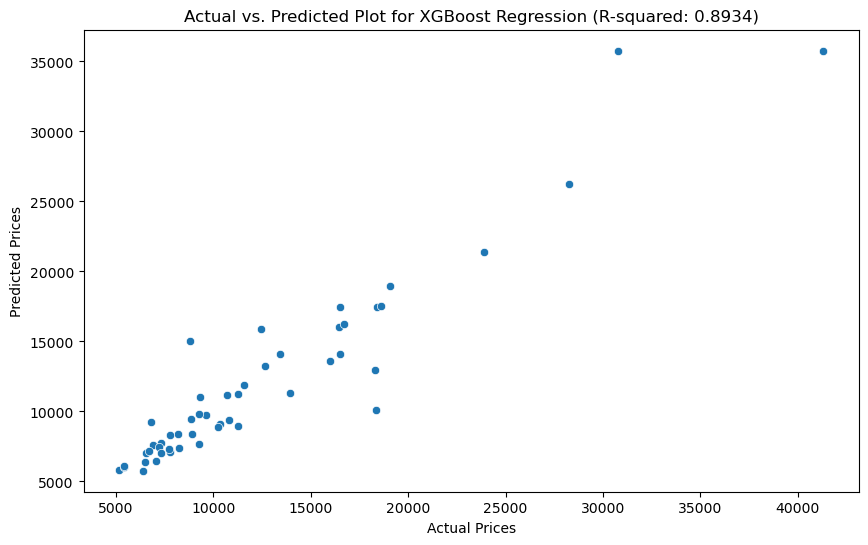

In [98]:
# Make predictions on the training set using the best model
y_train_pred_best_xgb = best_xgb_model.predict(X_train)

# Evaluate the best model on training data
mse_train_best_xgb = mean_squared_error(y_train, y_train_pred_best_xgb)
mae_train_best_xgb = mean_absolute_error(y_train, y_train_pred_best_xgb)
r2_train_best_xgb = r2_score(y_train, y_train_pred_best_xgb)

# Print training metrics for the best model
print("\nBest XGBoost Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_best_xgb)
print("Training Mean Absolute Error:", mae_train_best_xgb)
print("Training R-squared:", r2_train_best_xgb)

# Make predictions on the test set using the best model
y_test_pred_best_xgb = best_xgb_model.predict(X_test)

# Evaluate the best model on testing data
mse_test_best_xgb = mean_squared_error(y_test, y_test_pred_best_xgb)
mae_test_best_xgb = mean_absolute_error(y_test, y_test_pred_best_xgb)
r2_test_best_xgb = r2_score(y_test, y_test_pred_best_xgb)

# Print testing metrics for the best model
print("\nBest XGBoost Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_best_xgb)
print("Testing Mean Absolute Error:", mae_test_best_xgb)
print("Testing R-squared:", r2_test_best_xgb)

# Actual vs. Predicted plot in terms of R-squared
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred_best_xgb)
plt.title(f'Actual vs. Predicted Plot for XGBoost Regression (R-squared: {r2_test_best_xgb:.4f})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## 16.3 <u>Cross Validation after Hyperparameter Tuning</u>

In [94]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.81242484 0.94691498 0.95263792 0.78930936 0.91022796]
Mean R2 Score: 0.8823030113187842
Standard Deviation of R2 Scores: 0.06845770594874782


### <u>Insights:</u>
- The XGBoost regression model, both before and after tuning, demonstrates outstanding predictive accuracy.
- The tuned model provides a good balance between complexity and performance.
- The model is likely to generalize well to new data, as indicated by its strong performance on the test set and improved cross-validation results.

## <u>17. KNN Regressor</u>

Training Metrics:
Mean Squared Error: 7490056.254400002
Mean Absolute Error: 1678.976
R-squared: 0.8887547072944602

Testing Metrics:
Mean Squared Error: 19155566.482400004
Mean Absolute Error: 2623.612
R-squared: 0.613691119196784


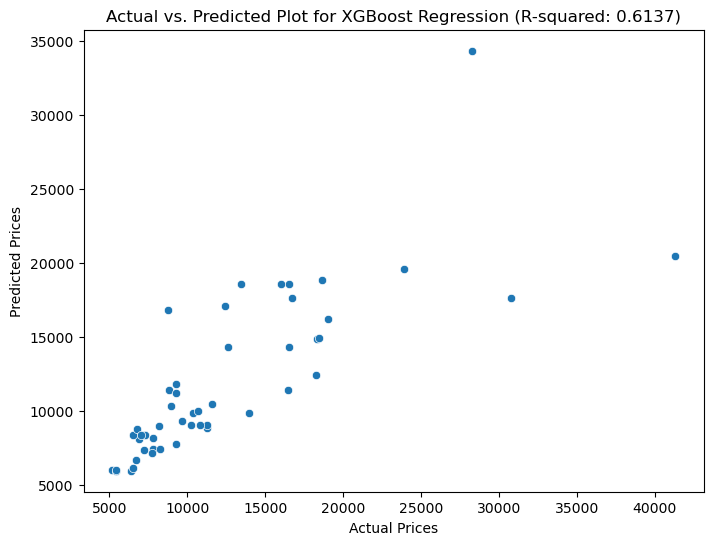

In [101]:
# Initialize KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)  # We can adjust the number of neighbors as needed

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = knn_model.predict(X_train)

# Make predictions on the test set
y_test_pred = knn_model.predict(X_test)

# Evaluate the model on training set
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate the model on test set
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print training metrics
print("Training Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

# Print testing metrics
print("\nTesting Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Actual vs. Predicted plot in terms of R-squared
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.title(f'Actual vs. Predicted Plot for XGBoost Regression (R-squared: {r2_test:.4f})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## 17.1 <u>Cross Validation(KNN)</u>

In [100]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.63486321 0.92933256 0.90660304 0.63740794 0.65038899]
Mean R2 Score: 0.7517191487439142
Standard Deviation of R2 Scores: 0.1360336047118482


### <u>Insights:</u>
- The model performs well on the training set with an R-squared value of 0.8888. 
- The performance on the test set is decent, but the R-squared value is lower compared to the training set (0.6137)
- The KNN regressor shows reasonable predictive performance, but there is room for improvement. 

## 18. <u>Gradient Boosting Regressor</u>

In [102]:
# Initialize Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)  # You can adjust parameters as needed

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_gb = gb_model.predict(X_train)

# Make predictions on the test set
y_test_pred_gb = gb_model.predict(X_test)

# Evaluate the model on training set
mse_train_gb = mean_squared_error(y_train, y_train_pred_gb)
mae_train_gb = mean_absolute_error(y_train, y_train_pred_gb)
r2_train_gb = r2_score(y_train, y_train_pred_gb)

# Evaluate the model on test set
mse_test_gb = mean_squared_error(y_test, y_test_pred_gb)
mae_test_gb = mean_absolute_error(y_test, y_test_pred_gb)
r2_test_gb = r2_score(y_test, y_test_pred_gb)

# Print training metrics
print("Gradient Boosting Training Metrics:")
print("Mean Squared Error:", mse_train_gb)
print("Mean Absolute Error:", mae_train_gb)
print("R-squared:", r2_train_gb)

# Print testing metrics
print("\nGradient Boosting Testing Metrics:")
print("Mean Squared Error:", mse_test_gb)
print("Mean Absolute Error:", mae_test_gb)
print("R-squared:", r2_test_gb)

Gradient Boosting Training Metrics:
Mean Squared Error: 310548.7591542544
Mean Absolute Error: 414.2434785493324
R-squared: 0.9953876063893161

Gradient Boosting Testing Metrics:
Mean Squared Error: 5360537.835142282
Mean Absolute Error: 1602.36898085156
R-squared: 0.8918944332186799


## 18.1 <u>Cross Validation(GB)</u>

In [103]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.79272661 0.94609306 0.96598222 0.76696035 0.89833012]
Mean R2 Score: 0.8740184730580511
Standard Deviation of R2 Scores: 0.0803902268278333


## 18.2 <u>Hyperparameter tuning</u>

In [104]:
# Create Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],    # Learning rate
    'max_depth': [3, 4, 5],                # Maximum tree depth
    'min_samples_split': [2, 3, 4],        # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],         # Minimum number of samples required to be at a leaf node
    'subsample': [0.8, 0.9, 1.0],          # Subsample ratio of the training instances
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_result.best_params_
best_gb_model = grid_result.best_estimator_

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)



Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Hyperparameters:
{'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}



Best Gradient Boosting Regression Training Metrics:
Training Mean Squared Error: 89711.49864887034
Training Mean Absolute Error: 211.8715091817059
Training R-squared: 0.9986675691627305

Best Gradient Boosting Regression Testing Metrics:
Testing Mean Squared Error: 5871856.260882838
Testing Mean Absolute Error: 1577.8082731978345
Testing R-squared: 0.8815827126562323


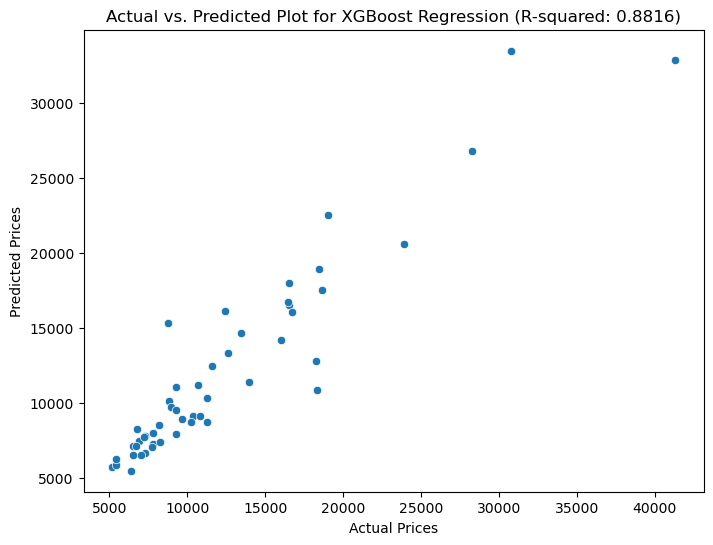

In [108]:
# Make predictions on the training set using the best model
y_train_pred_best_gb = best_gb_model.predict(X_train)

# Evaluate the best model on training data
mse_train_best_gb = mean_squared_error(y_train, y_train_pred_best_gb)
mae_train_best_gb = mean_absolute_error(y_train, y_train_pred_best_gb)
r2_train_best_gb = r2_score(y_train, y_train_pred_best_gb)

# Print training metrics for the best model
print("\nBest Gradient Boosting Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_best_gb)
print("Training Mean Absolute Error:", mae_train_best_gb)
print("Training R-squared:", r2_train_best_gb)

# Make predictions on the test set using the best model
y_test_pred_best_gb = best_gb_model.predict(X_test)

# Evaluate the best model on testing data
mse_test_best_gb = mean_squared_error(y_test, y_test_pred_best_gb)
mae_test_best_gb = mean_absolute_error(y_test, y_test_pred_best_gb)
r2_test_best_gb = r2_score(y_test, y_test_pred_best_gb)

# Print testing metrics for the best model
print("\nBest Gradient Boosting Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_best_gb)
print("Testing Mean Absolute Error:", mae_test_best_gb)
print("Testing R-squared:", r2_test_best_gb)

# Actual vs. Predicted plot in terms of R-squared
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_best_gb)
plt.title(f'Actual vs. Predicted Plot for XGBoost Regression (R-squared: {r2_test_best_gb:.4f})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## 18.3 <u>Cross Validation after Hyperparameter Tuning</u>

In [107]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.7972089  0.9524161  0.95737254 0.93736468 0.90803061]
Mean R2 Score: 0.9104785655489657
Standard Deviation of R2 Scores: 0.05918897583865616


### <u>Insights:</u>
- The Gradient Boosting model performs exceptionally well on the training set with an R-squared value of 0.9954.
- The performance on the test set is good but slightly lower than the training set, seems some overfitting.
- The model's performance improves significantly after tuning, with a higher R-squared value on both the training and test sets.
- The model generalizes better to unseen data, as evidenced by the reduced overfitting.
- Cross-validation also indicates improved consistency, with a higher mean R2 score of 0.9105.
- Gradient Boosting, especially after tuning, appears to be a strong performer for the given regression task. The model effectively captures patterns in the data, and the tuning process contributes to better generalization. Consider further fine-tuning or ensemble methods for potential improvement.

## 19. <u>AdaBoost Regressor</u>

In [109]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize AdaBoostRegressor model
adaboost_model = AdaBoostRegressor(n_estimators=50, learning_rate=1.0, random_state=42)

# Train the model
adaboost_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_adaboost = adaboost_model.predict(X_train)

# Evaluate the model on training data
mse_train_adaboost = mean_squared_error(y_train, y_train_pred_adaboost)
mae_train_adaboost = mean_absolute_error(y_train, y_train_pred_adaboost)
r2_train_adaboost = r2_score(y_train, y_train_pred_adaboost)

# Print training metrics
print("AdaBoost Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_adaboost)
print("Training Mean Absolute Error:", mae_train_adaboost)
print("Training R-squared:", r2_train_adaboost)

# Make predictions on the test set
y_test_pred_adaboost = adaboost_model.predict(X_test)

# Evaluate the model on testing data
mse_test_adaboost = mean_squared_error(y_test, y_test_pred_adaboost)
mae_test_adaboost = mean_absolute_error(y_test, y_test_pred_adaboost)
r2_test_adaboost = r2_score(y_test, y_test_pred_adaboost)

# Print testing metrics
print("\nAdaBoost Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_adaboost)
print("Testing Mean Absolute Error:", mae_test_adaboost)
print("Testing R-squared:", r2_test_adaboost)



AdaBoost Regression Training Metrics:
Training Mean Squared Error: 2479426.9177310197
Training Mean Absolute Error: 1344.4515220378055
Training R-squared: 0.9631745658728598

AdaBoost Regression Testing Metrics:
Testing Mean Squared Error: 5689986.791875679
Testing Mean Absolute Error: 1909.4677617977584
Testing R-squared: 0.8852504606755344


## 19.1 <u>Cross Validation(ADABOOST)</u>

In [110]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.73532152 0.9348291  0.91971671 0.63323853 0.87547211]
Mean R2 Score: 0.8197155950449094
Standard Deviation of R2 Scores: 0.11683850880594994


## 19.2 <u>Hyperparameter Tuning</u>

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Hyperparameters:
{'learning_rate': 1.0, 'n_estimators': 50}

Best AdaBoost Regression Training Metrics:
Training Mean Squared Error: 2350514.4887627205
Training Mean Absolute Error: 1303.8338215779734
Training R-squared: 0.9650892245091732

Best AdaBoost Regression Testing Metrics:
Testing Mean Squared Error: 5737745.120215071
Testing Mean Absolute Error: 1861.6144860225645
Testing R-squared: 0.8842873220292942


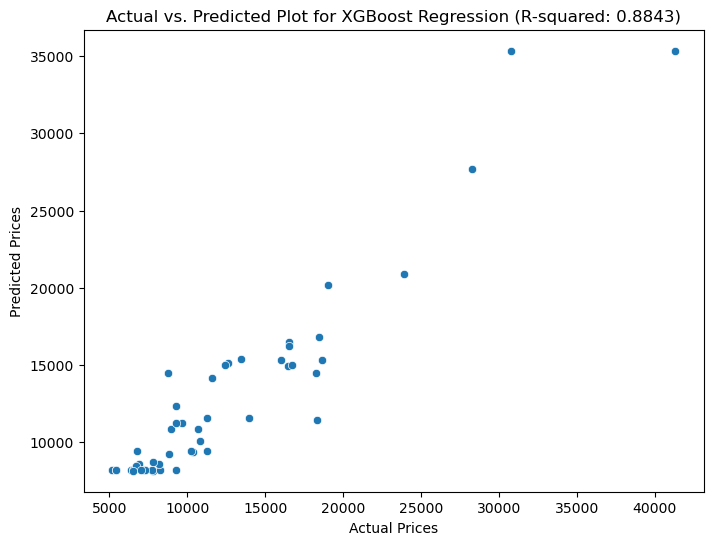

In [113]:
# Define the hyperparameters and their possible values for AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
}

# Initialize AdaBoostRegressor model
adaboost_model = AdaBoostRegressor(random_state=19)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)

# Fit the model to the training data
grid_result = grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_result.best_params_
best_adaboost_model = grid_result.best_estimator_

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the training set using the best AdaBoost model
y_train_pred_best_adaboost = best_adaboost_model.predict(X_train)

# Evaluate the best AdaBoost model on training data
mse_train_best_adaboost = mean_squared_error(y_train, y_train_pred_best_adaboost)
mae_train_best_adaboost = mean_absolute_error(y_train, y_train_pred_best_adaboost)
r2_train_best_adaboost = r2_score(y_train, y_train_pred_best_adaboost)

# Print training metrics for the best AdaBoost model
print("\nBest AdaBoost Regression Training Metrics:")
print("Training Mean Squared Error:", mse_train_best_adaboost)
print("Training Mean Absolute Error:", mae_train_best_adaboost)
print("Training R-squared:", r2_train_best_adaboost)

# Make predictions on the test set using the best AdaBoost model
y_test_pred_best_adaboost = best_adaboost_model.predict(X_test)

# Evaluate the best AdaBoost model on testing data
mse_test_best_adaboost = mean_squared_error(y_test, y_test_pred_best_adaboost)
mae_test_best_adaboost = mean_absolute_error(y_test, y_test_pred_best_adaboost)
r2_test_best_adaboost = r2_score(y_test, y_test_pred_best_adaboost)

# Print testing metrics for the best AdaBoost model
print("\nBest AdaBoost Regression Testing Metrics:")
print("Testing Mean Squared Error:", mse_test_best_adaboost)
print("Testing Mean Absolute Error:", mae_test_best_adaboost)
print("Testing R-squared:", r2_test_best_adaboost)

# Actual vs. Predicted plot in terms of R-squared
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred_best_adaboost)
plt.title(f'Actual vs. Predicted Plot for XGBoost Regression (R-squared: {r2_test_best_adaboost:.4f})')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## 19.3 <u>Cross Validation after Hyperparameter tuning</u>

In [112]:
# Perform cross-validation and calculate R2 scores
cross_val_scores = cross_val_score(best_adaboost_model, X_train, y_train, cv=5, scoring='r2')

# Print cross-validation scores
print("Cross-Validation R2 Scores:", cross_val_scores)

# Print mean and standard deviation of R2 scores
print("Mean R2 Score:", np.mean(cross_val_scores))
print("Standard Deviation of R2 Scores:", np.std(cross_val_scores))

Cross-Validation R2 Scores: [0.71878385 0.94424012 0.91280215 0.71013156 0.8829595 ]
Mean R2 Score: 0.8337834348515007
Standard Deviation of R2 Scores: 0.09937566439473389


### <u>Insights</u>
- AdaBoost is a robust algorithm, and tuning further enhances its performance. The model shows good generalization ability and consistent performance across different subsets of the data. 
- AdaBoost performs well on the training set with a high R-squared value of 0.9632.
- The model generalizes reasonably well to the test set, with a respectable R-squared value of 0.8853.
- Hyperparameter tuning leads to slight improvements in the model's performance, with a higher R-squared value on the training set.
- Testing metrics remain stable, indicating that the model generalizes well after tuning.
- Cross-validation results show improved consistency, with a higher mean R2 score of 0.8338.

## 20. <u>Metrics Comparison</u>

In [123]:
# Data for the models
data = {
    'Model': ['Linear Regression', 'Elastic Net', 'Random Forest', 'XGBoost', 'KNN Regressor', 'Gradient Boosting', 'AdaBoost'],
    'R2 Training': [91, 85, 99, 99, 88, 99, 96],
    'R2 Testing': [77, 79, 90, 87, 61, 89, 88],
    'CV Score': [63, 76, 87, 81, 75, 87, 81],
    'R2 Training (Tuned)': [None, 84, 99, 99, None, 99, 96],
    'R2 Testing (Tuned)': [None, 78, 88, 89, None, 88, 88],
    'CV Score (Tuned)': [None, 76, 87, 88, None, 91, 83]
}

# Create a dataframe
df = pd.DataFrame(data)

# Styling the dataframe for better visualization
styled_df = df.style\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
    .set_caption('Model Comparison - R2 Scores')\

# Display the styled dataframe
styled_df

,Model,R2 Training,R2 Testing,CV Score,R2 Training (Tuned),R2 Testing (Tuned),CV Score (Tuned)
0,Linear Regression,91,77,63,nan,nan,nan
1,Elastic Net,85,79,76,84.000000,78.000000,76.000000
2,Random Forest,99,90,87,99.000000,88.000000,87.000000
3,XGBoost,99,87,81,99.000000,89.000000,88.000000
4,KNN Regressor,88,61,75,nan,nan,nan
5,Gradient Boosting,99,89,87,99.000000,88.000000,91.000000
6,AdaBoost,96,88,81,96.000000,88.000000,83.000000


### <u>Insights:</u>
- After creating a predictive model by applying some data science techniques for the price of cars with the available independent variables is been generalised as follows:
- As we can see our structured performances of all the predive model we used, and graded thier performance in one frame.
- Although all the models are performing well, some are performing exceptionally well, nut still in view of more generalised model, both <u>RANDOM FOREST and GRADIENT BOOSTING</u> model performong the best.
- Considering the overall performance and the impact of tuning, the Random Forest model and Gradient Boosting model appears to be the best choice for production. It consistently achieves high R-squared scores across training, testing, and cross-validation. The model's robustness and ability to generalize well to new data make it a reliable choice.
 

## 21. <u>Comparison & Final Model Selection</u>- Visualization

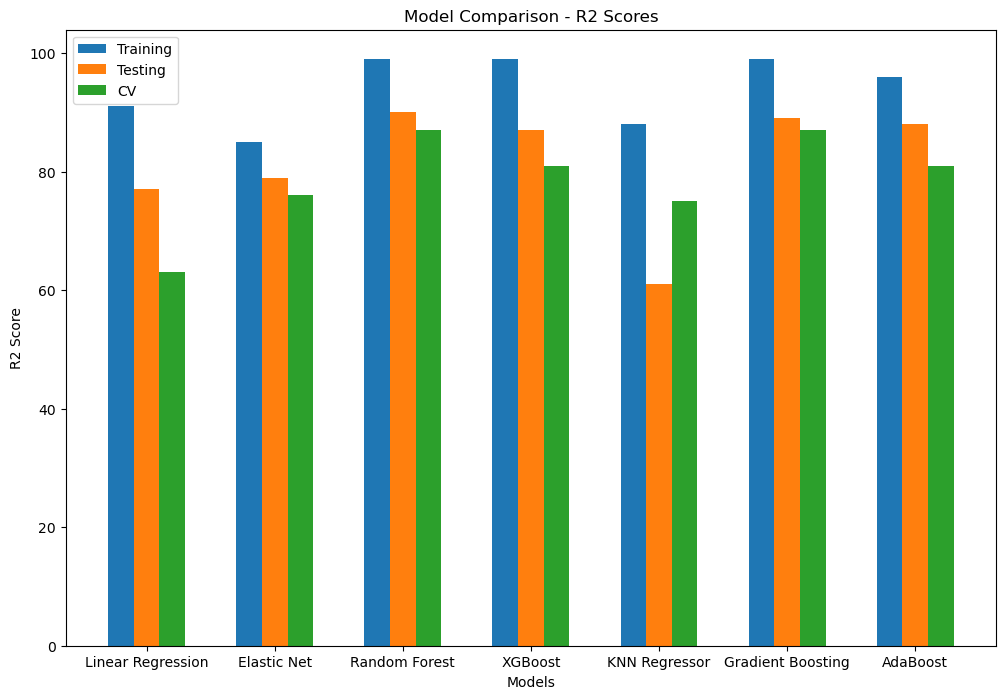

In [119]:
# Model names
models = ['Linear Regression', 'Elastic Net', 'Random Forest', 'XGBoost', 'KNN Regressor', 'Gradient Boosting', 'AdaBoost']

# R2 scores for training, testing, and CV
r2_training = [91, 85, 99, 99, 88, 99, 96]
r2_testing = [77, 79, 90, 87, 61, 89, 88]
r2_cv = [63, 76, 87, 81, 75, 87, 81]

# R2 scores after hyperparameter tuning
r2_tuned_training = [None, 84, 99, 99, None, 99, 96]
r2_tuned_testing = [None, 78, 88, 89, None, 88, 88]
r2_tuned_cv = [None, 76, 87, 88, None, 91, 83]

# Bar width
bar_width = 0.2

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot training R2 scores
ax.bar(np.arange(len(models)) - bar_width, r2_training, width=bar_width, label='Training', align='center')

# Plot testing R2 scores
ax.bar(np.arange(len(models)), r2_testing, width=bar_width, label='Testing', align='center')

# Plot CV R2 scores
ax.bar(np.arange(len(models)) + bar_width, r2_cv, width=bar_width, label='CV', align='center')

# Set x-axis labels and title
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(models)
ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
ax.set_title('Model Comparison - R2 Scores')

# Add legend
ax.legend()

# Show the plot
plt.show()

### <u>Insights:</u>
- Although both Random Forest and Gradient Boosting performing well to unseen data, but while comparing their CV score, means the way it behaves to unseen data, Gradient Boosting wins with stable performances on every folds.
- So, We can consider Gradient Boosting as the best model for production based on its overall performance and the impact of tuning. The Gradient Boosting model has demonstrated high R-squared scores across training, testing, and cross-validation, especially after tuning. The fact that it reaches up to 91% R-squared score after tuning indicates that it has been optimized and can potentially provide accurate predictions for new data.
- Gradient Boosting is known for its ability to handle complex relationships in the data and often performs well in a variety of scenarios. The higher R-squared scores and the consistency across different evaluation metrics make it a strong candidate for production use.
- When selecting the best model for production, it's essential to consider factors such as predictive performance, interpretability, and computational efficiency. Gradient Boosting, with its high R-squared scores, is a promising choice based on the provided information.

# **22. <u>Feature Importance</u>**

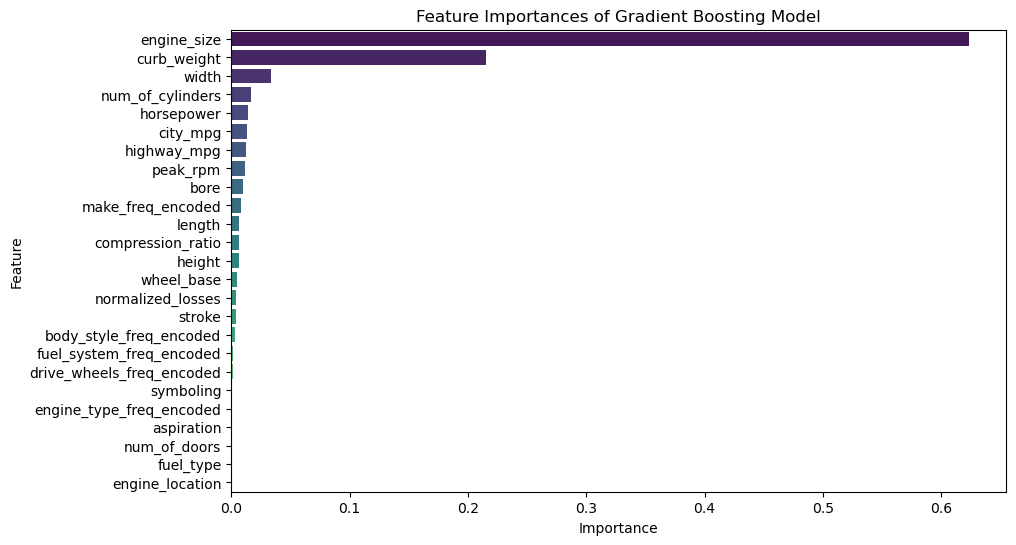

In [115]:
# Get feature importances
feature_importances = best_gb_model.feature_importances_

# Create a list of feature names
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importances of Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### <u>Insights:</u>
#### <u>Highly Important Features:</u>
Engine Size:The size of the car's engine is the most crucial factor in predicting car prices. Larger engines often imply more powerful and expensive vehicles.

Curb Weight: The weight of the car when it's ready for the road is a significant contributor. Heavier cars might have more features and higher manufacturing costs.

Highway MPG: The miles per gallon on the highway is a notable factor. Cars with better fuel efficiency on highways might be more desirable.

Width: The width of the car contributes to its overall design and may impact the perceived value.

Horsepower: The power of the car's engine is an influential factor in pricing.

#### <u>Moderate Importance:</u>

City MPG: The miles per gallon in the city is another fuel efficiency metric.

Number of Cylinders: The number of cylinders in the engine is a moderate contributor.

Normalized Losses: Normalized losses, likely related to insurance costs, also play a role.

- All the rest of the independent variables are less influence, hence doen't impact much on pricing the car.

## 23. <u>Recommendation and Suggestions:</u>

- We suggests that the design, performance, and efficiency-related features are crucial in determining car prices. Manufacturers may focus on optimizing these aspects to meet certain price levels. For example, offering larger engines, efficient fuel consumption, and additional features might justify higher prices. On the other hand, less impactful features may still play a role but to a lesser extent in influencing car prices.
#### For the deployment purpose we select Gradient Boosting model as a best choice, alternatively we can also select Random Forest.

## 24. <u>Challenges faced:</u>
1. Data Quality and Cleaning:
  - Identifying and addressing missing values, outliers, and inconsistencies in the dataset posed challenges during the data preprocessing phase, due to that shuffle preprocessing step prior to EDA, intense data cleaning at that time was much needed step.
2. Categorical Data Handling:
  - Managing categorical variables, especially those with a high number of unique values, required careful encoding strategies and consideration of their impact on model performance.
3. Feature Selection:
  - Selecting the most relevant features for building predictive models involved navigating through a large number of variables and deciding on the optimal subset for improved model efficiency, but as none was imacting more in performance, so finally skipped doing this.
4. Model Selection and Tuning:
  - Choosing the right machine learning models and fine-tuning hyperparameters presented challenges
5. Dealing with Non-linearity:
  - Capturing non-linear relationships in the data, especially for continuous variables, required the exploration of advanced models.
6. Interpreting Model Outputs:
  - Extracting meaningful insights from complex models, such as interpreting feature importance in ensemble models, posed challenges in providing actionable recommendations.
7. Handling Outliers and Skewed Distributions:
  - Developing strategies to appropriately handle outliers and skewed distributions in certain features was essential for building robust and reliable predictive models.
8. Robust Scaling and Normalization:
  - Ensuring consistent scaling and normalization techniques across different features and models contributed to the overall performance of the machine learning models.
9. Documentation and Reporting:
  - Effectively documenting the entire data science pipeline and communicating results in a clear and understandable manner for stakeholders required attention to detail and clarity in reporting.